Kolokwium I

In [ ]:
#Napisz funkcję do wygenerowania obrazu binarnego prostokąta o zadanych parametrach.
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
%matplotlib inline

def generate_rectangle(x_size, y_size, x_origin, y_origin, width, height):

	x_size, y_size = 400, 400
	x_origin, y_origin = 256, 256
	width, height = 400, 200
	rectangle = np.zeros((y_size, x_size))
	rectangle[y_origin:y_origin+height, x_origin:x_origin+width] = 1
	return rectangle

	rectangle = generate_rectangle(x_size, y_size, x_origin, y_origin, width, heigth)

	plt.figure(dpi=150)
	plt.imshow(rectangle, cmap='gray')
	plt.axis('off')
	plt.show()

 #Napisz samodzielnie funkcję implementującą operacje erozji i dylatacji. Wywołaj obie funkcje na wygenerowanym prostokącie i
 # pokaż obrazy różnicowe zarówno dla erozji jak i dylatacji (względem obrazu wejściowego).
 def erosion(image, structural_element):
  r,c=image.shape
  erosion_image=np.zeros((r,c))
  s=(structural_element.shape[0]-1)//2
  for i in range(s,r-s):
    for j in range(s,c-s):
      temp=image[i-s:i+s+1,j-s:j+s+1]
      img=temp*structural_element
      erosion_image[i,j]=np.min(img)
  return erosion_image


def dilation(image, structural_element):
  r,c=image.shape
  dilation_image=np.zeros((r,c))
  s=(structural_element.shape[0]-1)//2
  for i in range(s,r-s):
    for j in range(s,c-s):
      temp=image[i-s:i+s+1,j-s:j+s+1]
      img=temp*structural_element
      dilation_image[i,j]=np.max(img)
  return dilation_image
  import numpy as np

rectangle = None # TODO
se = np.ones((3, 3))
eroded_rectangle = erosion(rectangle, se)
dilated_rectangle = dilation(rectangle, se)
# Wizualizacja - # TODO
x_size, y_size = 400, 400
x_origin, y_origin = 256, 256
width, height = 400, 200

rectangle = generate_rectangle(x_size, y_size, x_origin, y_origin, width, height)
se = np.ones((3, 3))
eroded_rectangle = erosion(rectangle, se)
dilated_rectangle = dilation(rectangle, se)


plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(eroded_rectangle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Eroded")
plt.subplot(1, 2, 2)
plt.imshow(dilated_rectangle , cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilated")
plt.show()

#apisz funkcję do obliczania histogramu. Nie używaj gotowych funkcji bibliotecznych wyznaczających histogram. (10 pkt)
def histogram(image, bins=100):
  unique,unique_counts=np.unique(image.ravel(),return_counts=True)
  max_value,min_value=image.max(),image.min()
  diff=max_value-min_value
  histogram=np.zeros(bins)
  for i in range(len(histogram)):
    start_value=min_value+i*diff/bins
    end_value=min_value+(i+1)*diff/bins
    histogram[i]=np.sum(unique_counts[np.logical_and(unique>=start_value,unique<end_value)])
    histogram[-1]+=unique_counts[-1]
  return histogram

#Zaimplementuj funkcję generującą macierz przekształceń sztywnych (2 pkt)
def gen_rigid_matrix(xt, yt, rot):
    rot = rot * np.pi / 180
    rigid_matrix = np.array([
      [np.cos(rot), -np.sin(rot), xt],
      [np.sin(rot), np.cos(rot), yt],
      [0, 0, 1]
      ])
    return rigid_matrix

rigid_matrix = gen_rigid_matrix(40, 40, 35)
print("rigid_matrix: ")
print(rigid_matrix)

# transformacja względem środka obrazu:

def center(transform, x_size, y_size):
    x_origin = (x_size / 2)
    y_origin = (y_size / 2)
    array_1 = np.array([
      [1, 0, x_origin],
      [0, 1, y_origin],
      [0, 0, 1]
    ])

    array_2 = np.array([
      [1, 0, -x_origin],
      [0, 1, -y_origin],
      [0, 0, 1]
    ])

    center = array_1 @ transform @ array_2
    return center

centered = center(rigid_matrix, x_size, y_size)
print("Przykładowe wywołanie: transformacja względem środka obrazu: ")
print(centered)

# transformacja względem początku układu współrzędnych:

def rigid_dot(grid_x, grid_y, transform):
    coors = np.array([grid_x.ravel(), grid_y.ravel(), np.ones(grid_x.size)])
    new_coors = transform @ coors
    grid_x = new_coors[0,:].reshape(grid_x.shape)
    grid_y = new_coors[1,:].reshape(grid_y.shape)

    return grid_x, grid_y

# dokumentacja
mport os # dobre chyba
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision as tv
import matplotlib.pyplot as plt

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear):
        super(UNet, self).__init__()

        self.inc = nn.Conv2d(n_channels, 64, kernel_size=3, padding=1)
        self.down1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.down2 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.down3 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.down4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.up1 = nn.ConvTranspose2d(1024, 256, kernel_size=2, stride=2)
        self.up2 = nn.ConvTranspose2d(512, 128, kernel_size=2, stride=2)
        self.up3 = nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2)
        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5)
        x = self.up2(x)
        x = self.up3(x)
        x = self.up4(x)
        x = self.outc(x)
        x = self.act(x)
        return x


# Generowanie szumu losowego
batch_size = 4
y_size = 256  # Przykładowy rozmiar w pionie
x_size = 256  # Przykładowy rozmiar w poziomie

rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

testing_dataloader = torch.utils.data.DataLoader(testing_dataset, batch_size=batch_size, shuffle=False)

# Wyświetlanie obrazów z DataLoadera
for images, classes in testing_dataloader:
    for i in range(batch_size):
        plt.subplot(batch_size, batch_size, i+1)
        plt.imshow(images[i][0, :, :], cmap="gray")
        plt.axis("off")

    break

# Tworzenie obiektu sieci UNet
model = UNet()

# Sprawdzanie rozmiaru wyjścia sieci
for images, classes in testing_dataloader:
    output = model(images)
    print("Rozmiar wyjścia sieci:", output.size())
    break

#binarne prostokaty

import torch # dobrzeeee
import torchvision
import matplotlib.pyplot as plt

class RectangleGenerator(torch.utils.data.Dataset):
    def __init__(self, x_size, y_size, num_images, min_width, max_width, min_height, max_height):
        self.x_size = x_size
        self.y_size = y_size
        self.num_images = num_images
        self.min_width = min_width
        self.max_width = max_width
        self.min_height = min_height
        self.max_height = max_height

    def __len__(self):
        return self.num_images

     def __getitem__(self, idx):
        image = np.zeros((self.y_size, self.x_size), dtype=int)

        width = np.random.randint(self.min_width, self.max_width)
        height = np.random.randint(self.min_height, self.max_height)

        x_start = np.random.randint(0, self.x_size - width)
        y_start = np.random.randint(0, self.y_size - height)

        image[y_start:y_start+height, x_start:x_start+width] = 1

        return image

# Parametry
x_size = 300
y_size = 300
num_images = 100
min_width = 10
max_width = 100
min_height = 10
max_height = 100
batch_size = 16

# Inicjalizacja dataloadera
generator = RectangleGenerator(x_size, y_size, num_images, min_width, max_width, min_height, max_height)
testing_dataloader = torch.utils.data.DataLoader(generator, batch_size=batch_size, shuffle=False)

# Wyświetlanie wygenerowanych obrazów
plt.figure(figsize=(16, 16))
for images, classes in testing_dataloader:
    for i in range(batch_size):
        plt.subplot(batch_size//4, 4, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(classes[i].item())
        plt.axis("off")
    plt.tight_layout()
    break  # Wyświetlanie tylko pierwszej partii obrazów
plt.show()

# Laboratorium 1 - Operacje podstawowe, gradient, filtracja

In [ ]:
import numpy as np # Podstawowa biblioteka numeryczna
import matplotlib.pyplot as plt # Biblioteka do wizualizacji 2D
import scipy.signal as signal # Podstawowe funckcje przetwarzania sygnałów
import scipy.ndimage as nd # Podstawowe funkcje przetwarzania obrazów
from skimage import io
from skimage import color
%matplotlib inline

Wczytajmy, znormalizujmy i wyświetlmy przykładowy obraz:

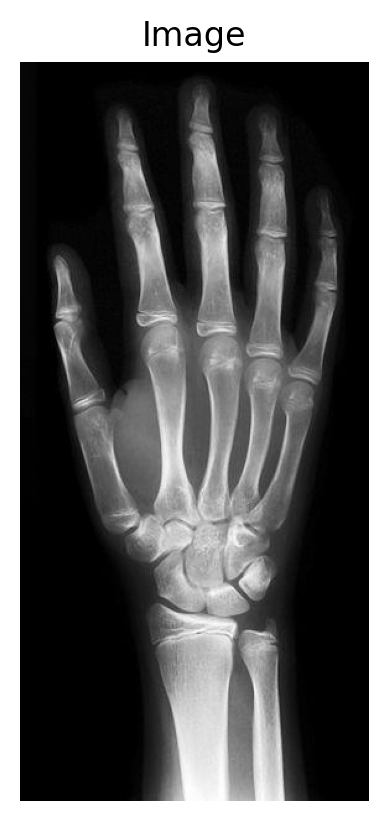

In [ ]:
image = io.imread("xray.png")
image = color.rgb2gray(image) # Konwersja do przestrzeni szarości
image = (image - np.min(image)) / (np.max(image) - np.min(image)) # Normalizacja do zakresu [0-1]
plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.show()

W kolejnym kroku użyjmy gotowej funkcji do wyznaczania gradientu (jako dyskretnej aproksymacji funkcji R^2 -> R):

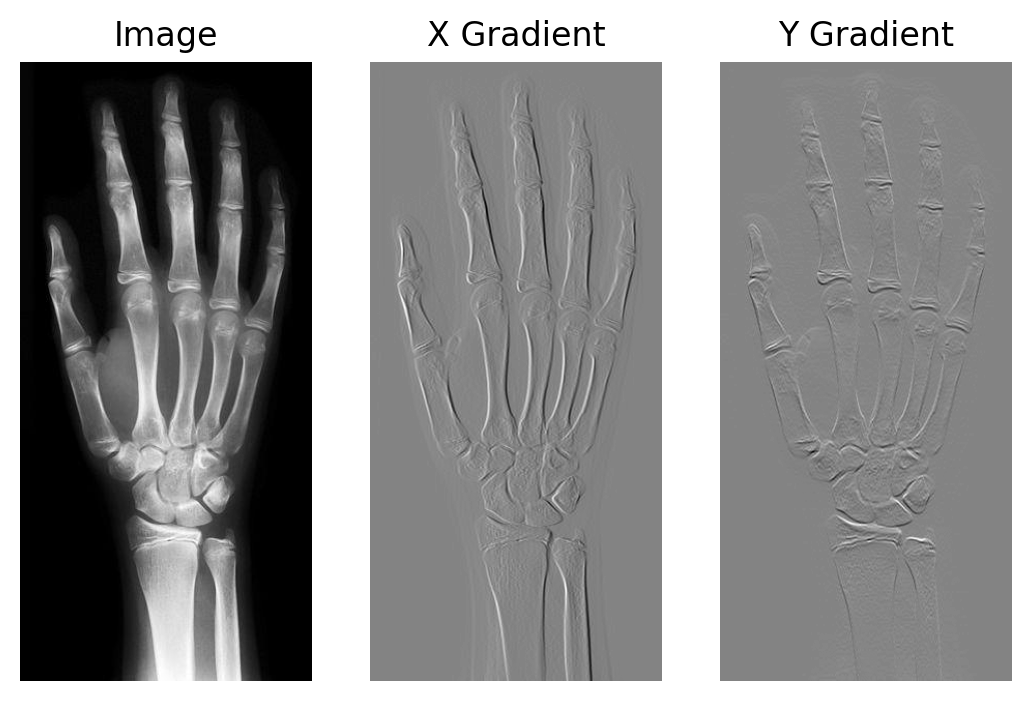

In [ ]:
#gradient to filtr gornoprzepustowy, bo przepuszcza miejsca o wysokiej zmianie koloru (tam gdzie staly kolor albo niewielka zmiana to blokuje
#funkcja np.gradient zwraca krotkę -> pierwszy element to gradient wzdłóż osi y a drugi wzdłóż osi x
#gradient X - zmiany wertykalne (różnice horyzontalne) gradnient y - zmiany horyzontalne (bo różnica wertykalna)
"""
G(I(x, y)) = [dI(x, y)/dx, dI(x, y)/dy]
image[y, x]
"""

y_gradient, x_gradient = np.gradient(image)
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(x_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(y_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()

W kolejnym kroku proszę zaimplementować własną funkcję do obliczenia gradientu (nie korzystając z gotowych funkcji gradientowych). Funkcja jako argument powinna przyjmować obraz oraz sposób obliczania gradientu (backward, central, forward). Do wartości brzegowych przypisz 0.

In [ ]:
"""
Gf(x, y) = [(f(x + step, y) - f(x - step, y) / 2), (f(x, y + step) - f(x, y - step) / 2)]
Gf(x, y) = [f(x + step, y) - f(x , y), f(x, y + step) - f(x, y)]
Gf(x, y) = [f(x, y) - f(x - step , y), f(x, y) - f(x, y - step)]
"""


def our_gradient(image, mode):
  gradient_y = np.zeros_like(image) #zmienne maja taki sam rozmiar jak obraz wejsciowy (czyli robimy czarny obraz wielkosci wjsciowego z zer)
  gradient_x = np.zeros_like(image)
  if(mode=="central"):
    gradient_y[1:-1, :] = (image[2:, :] - image[0:-2, :]) / 2.0
    gradient_x[:, 1:-1] = (image[:, 2:] - image[:, 0:-2]) / 2.0 #central
  if(mode=="forward"):
      gradient_y[0,:] = (image[1,:] - image[0,:])/1.0
      gradient_x[:,0] = (image[:,1] - image[:,0])/1.0  #forward, dla zerowego elem idziemy wprzód
  if(mode == "backward"):
        gradient_y[-1,:] = (image[-1, :] - image[-2,:])/1.0
        gradient_x[:,-1] = (image[:, -1] - image[:,-2])/1.0 #backward, dla ostatniego elem cofamy się w tył
  return gradient_y, gradient_x

Przykładowy wynik działania funkcji:

In [ ]:
np.random.seed(123)
rand_image = np.random.randn(5, 5)
y_numpy, x_numpy = np.gradient(rand_image)
y_forward, x_forward = our_gradient(rand_image, "forward")
y_central, x_central = our_gradient(rand_image, "central")
y_backward, x_backward = our_gradient(rand_image, "backward")
print("Y_numpy, X_numpy: ")
print(y_numpy)
print(x_numpy)
print("Y_forward, X_forward: ")
print(y_forward)
print(x_forward)
print("Y_central, X_central: ")
print(y_central)
print(x_central)
print("Y_backward, X_backward: ")
print(y_backward)
print(x_backward)

Y_numpy, X_numpy: 
[[ 2.73706714 -3.42402469 -0.71189113  2.77223097 -0.28814015]
 [ 0.20337223 -0.54602721  0.60420556  0.43369636  0.06730915]
 [-1.04289391  2.31630466  1.30784936 -0.13094118  0.6264634 ]
 [ 0.70812736  0.7927205  -1.21361175  0.90736552 -0.40494935]
 [ 1.17171985 -0.71519805 -3.12261996  0.17177515 -1.64006707]]
[[ 2.08297605  0.68430455 -1.25182008 -0.43078938  0.92769446]
 [-4.07811578 -1.04017458  1.84630775 -0.21891389 -2.13267666]
 [ 0.58417718  1.08513789 -0.27209651 -0.96768579  0.19492004]
 [ 2.64028136  1.31056868 -0.60093809 -0.90029984 -0.6178675 ]
 [ 0.75336345 -0.83660122 -0.15745149 -0.1590234  -2.42970971]]
Y_forward, X_forward: 
[[ 2.73706714 -3.42402469 -0.71189113  2.77223097 -0.28814015]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[[ 2.08297

W jaki sposób funckcja gradient w bibliotece numpy traktuje przypadki brzegowe?

Następnie zaimplementuj przybliżenie gradientu za pomocą filtrów Sobela i Prewitta (zwróć uwagę na różnice między konwolucją, a korelacją). Możesz użyć gotowych funkcji do konwolucji/korelacji.

In [ ]:
#korelacja to to samo co konwolucja, tylko w konwolucji jest znak minus przy całce przy oknie
#uzywamy tutaj korelacji! Konwolucja zmienia nam kolejność zmian ktore wykonujrmy

#nie ma znaczenia miedzy korelacja a konwolucja dla filtrow symetrycznych
""""
1-D
X = [...]
W = [-1, 0, 1]
2-D
Wx =
[
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]
]
Wy =
[
    [0, -1, 0],
    [0, 0, 0],
    [0, 1, 0]
]
"""


def sobel_gradient(image):
  # TO DO
    sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
  ])

    sobel_y = sobel_x.T

    gradient_x = signal.correlate2d(image, sobel_x)
    gradient_y = signal.correlate2d(image, sobel_y)

    return gradient_y, gradient_x

def prewitt_gradient(image):
  # TO DO
    prewitt_x = np.array([
      [-1,0,1],
      [-1,0,1],
      [-1,0,1]
    ])

    prewitt_y = prewitt_x.T

    gradient_x = signal.correlate2d(image, prewitt_x)
    gradient_y = signal.correlate2d(image, prewitt_y)

    return gradient_y, gradient_x

Przykładowy wynik działania funkcji:

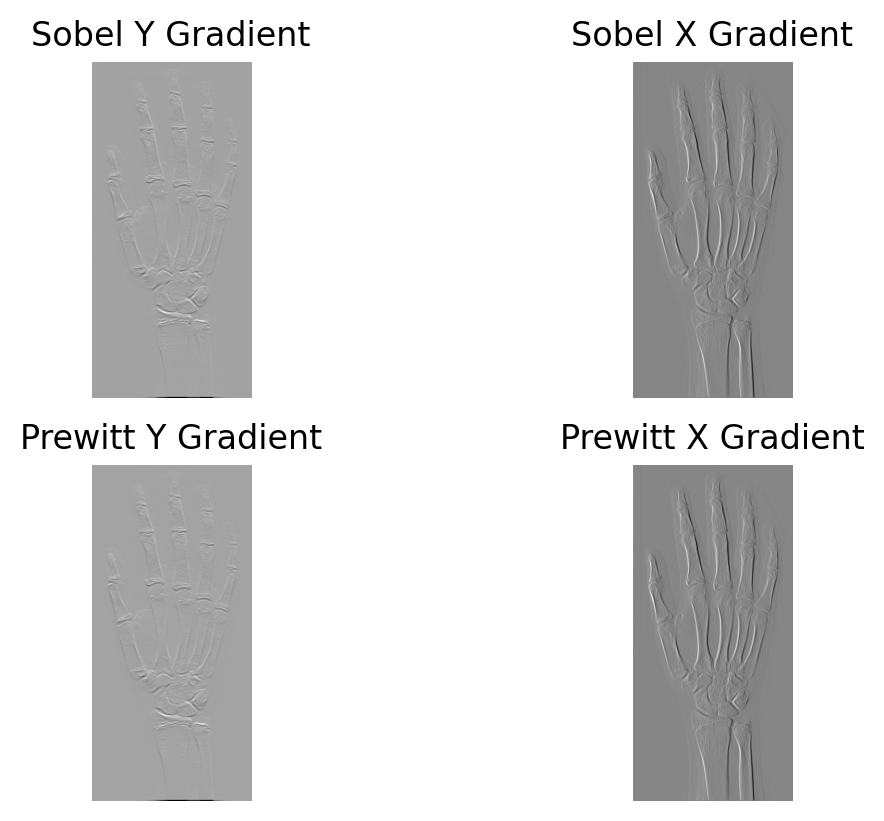

In [ ]:
sobel_y_gradient, sobel_x_gradient = sobel_gradient(image)
prewitt_y_gradient, prewitt_x_gradient = prewitt_gradient(image)

y_gradient, x_gradient = np.gradient(image)
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.imshow(sobel_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel Y Gradient")
plt.subplot(2, 2, 2)
plt.imshow(sobel_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel X Gradient")
plt.subplot(2, 2, 3)
plt.imshow(prewitt_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt Y Gradient")
plt.subplot(2, 2, 4)
plt.imshow(prewitt_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt X Gradient")
plt.show()

W kolejnym kroku wyznacz magnitudę oraz kąt gradientu:

In [ ]:
#magnituda gradientu np do wyznaczania krawędzi w obrazach, widać wszystkie zmiany intensywonsci (horyzontalnie , pod katem, wertykalnie)

def gradient_magnitude(x_gradient, y_gradient):
    # TO DO
  return np.sqrt(x_gradient*x_gradient+y_gradient*y_gradient)
def gradient_angle(x_gradient, y_gradient):
    # TO DO
  return np.arctan(y_gradient/x_gradient)
  #lub to return np.arctan(x_gradient, y_gradient)


Przykładowy wynik działania funkcji poniżej. Czy taki sposób wizualizacji kąta gradientu jest poprawny i informacyjny? Uzasadnij. Co przedstawia magnituda, a co kąt gradientu?

<ipython-input-11-9dc3cef8bee4>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan(y_gradient/x_gradient)
<ipython-input-11-9dc3cef8bee4>:8: RuntimeWarning: invalid value encountered in true_divide
  return np.arctan(y_gradient/x_gradient)


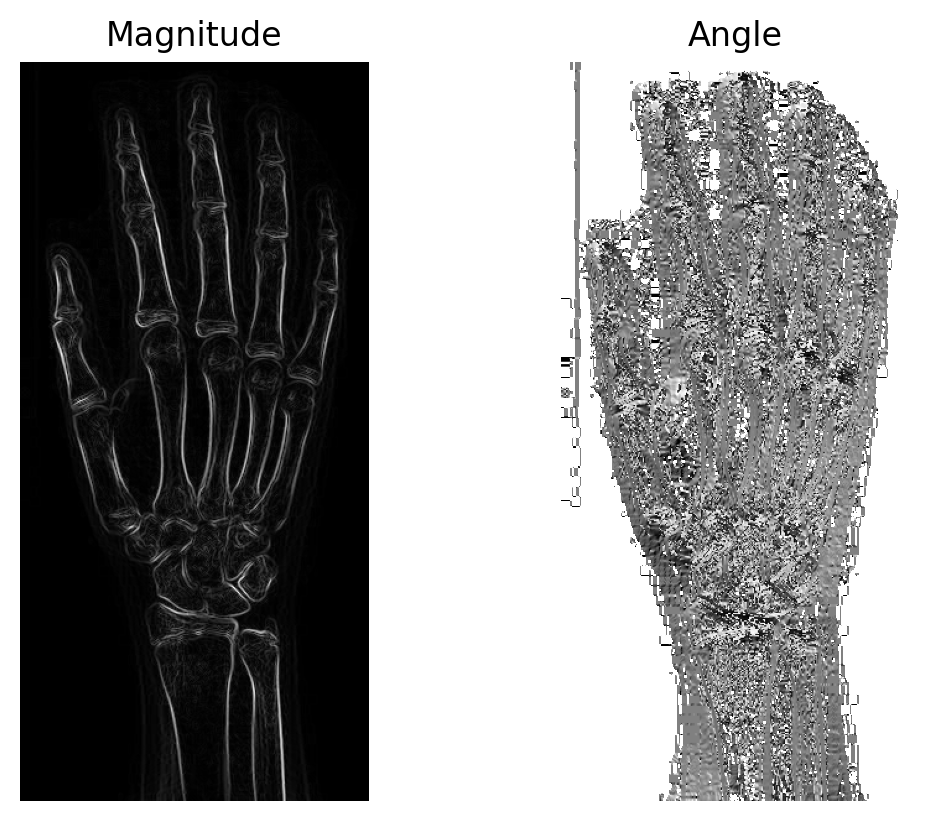

In [ ]:
mag, angle = gradient_magnitude(x_gradient, y_gradient), gradient_angle(x_gradient, y_gradient)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(mag, cmap='gray')
plt.axis('off')
plt.title("Magnitude")
plt.subplot(1, 2, 2)
plt.imshow(angle, cmap='gray')
plt.axis('off')
plt.title("Angle")
plt.show()

W kolejnym zadaniu dokonaj filtracji obrazu filtrem uśredniającym (średnią arytmetyczną, średnią ważoną filtrem Gaussa oraz filtrem medianowym). Możesz użyć gotowych funkcji do filtracji/korelacji/konwolucji ale nie używaj gotowej funkcji filtru medianowego.

In [ ]:

def uniform_filter(image, filter_size=(3, 3)):
    # TO DO
    result = nd.uniform_filter(image, filter_size)
    return result

#Własna funkcja:
 # x = filter_size[0]//2
 # y = filter_size[1]//2
 # img_filtered = np.zeros(image.shape)
 # for i in range(image.shape[0]):
 #   for j in range(image.shape[1]):
 #     img_filtered[i,j] = np.mean(image[i-x:i+x+1,j-y:j+y+1])
 # return img_filtered

def gaussian_filter(image, sigma):
    # TO DO

#Gotowa funkcja:

   result = nd.gaussian_filter(image, sigma)
   return result

#   # def my_gaussian_filter(image, sigma=3):
#      filter_size = 2 * int(4 * sigma + 0.5) + 1
#      gaussian_filter = np.zeros((filter_size, filter_size), np.float32)

#      m = filter_size//2
#      n = filter_size//2

#      for x in range(-m, m+1):
#        for y in range(-n, n+1):
#          x1 = 2*np.pi*(sigma**2)
#          x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
#          gaussian_filter[x+m, y+n] = (1/x1)*x2

#      im_filtered = np.zeros_like(image, dtype=np.float32)
#      im_filtered[:, :] = np.convolve(image[:, :], gaussian_filter)

#      return im_filtered


def median_filter(image, filter_size=(3, 3)):
    # TO DO

  x = filter_size[0]//2
  y = filter_size[1]//2
  img_filtered = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      img_filtered[i,j] = np.median(image[i-x:i+x+1,j-y:j+y+1])
  return img_filtered

#Gotowa funkcja:
#    result = nd.median_filter(image, filter_size)
#    return result


#DO FILTROW MEDIANOWYCH NIE USREDNIAMY ZADNYCH WARTOSCI, BIERZEMY MEDIANĘ
#filtr medianowy jest nieliniowy, przez co jest on zdecydowanie wolnieszy
#w filtracji gaussa duzo wieksza wage ma piksel centralny, natomiast w rownomiernym te wagi sasiednich pikseli sa bardzo podobne


Przykładowy wynik został pokazany poniżej. Wytłumacz różnicę między filtrem uśredniającym średnią arytmetyczną oraz filtrem Gaussa. Która filtracja jest bardziej pożądana? Dlaczego? Po co dokonujemy uśredniania? Przypomnij sobie informacje dotyczące widma i wpływu filtracji z teorii sygnałów. Jakie są zalety i wady filtracji medianowej? Filtracja medianowa jest operacją liniową czy nieliniową?

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


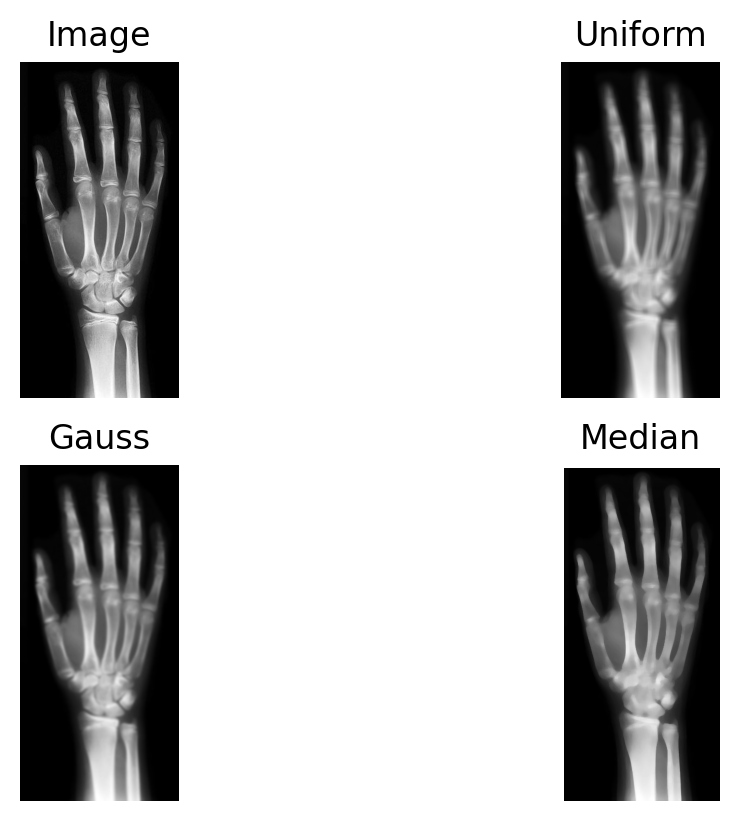

In [ ]:
uni_image = uniform_filter(image, (9, 9))
gauss_image = gaussian_filter(image, 2)
median_image = median_filter(image, (9, 9))
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(2, 2, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.title("Uniform")
plt.subplot(2, 2, 3)
plt.imshow(gauss_image, cmap='gray')
plt.axis('off')
plt.title("Gauss")
plt.subplot(2, 2, 4)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.title("Median")
plt.show()

W ostatnim kroku zaimplementuj funkcję do wyznaczania Laplasjanu (możesz użyć gotowych funkcji do korelacji/konwolucji).

In [ ]:
#do wykrywania krawedzi, wykorzystuje 2 pochodna, wykorzystuje tylko jedno jądro

def laplace(image):
    # TO DO

  window = np.array([
                   [0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]
  ])
  laplacian_image = signal.correlate2d(image, window)
  return laplacian_image

#lub gotowa funkcja:
#    result = nd.laplace(image)
#    return result

Przykładowy wynik został pokazany poniżej. Co przedstawa Laplasjan? Do czego może być wykorzystywany?

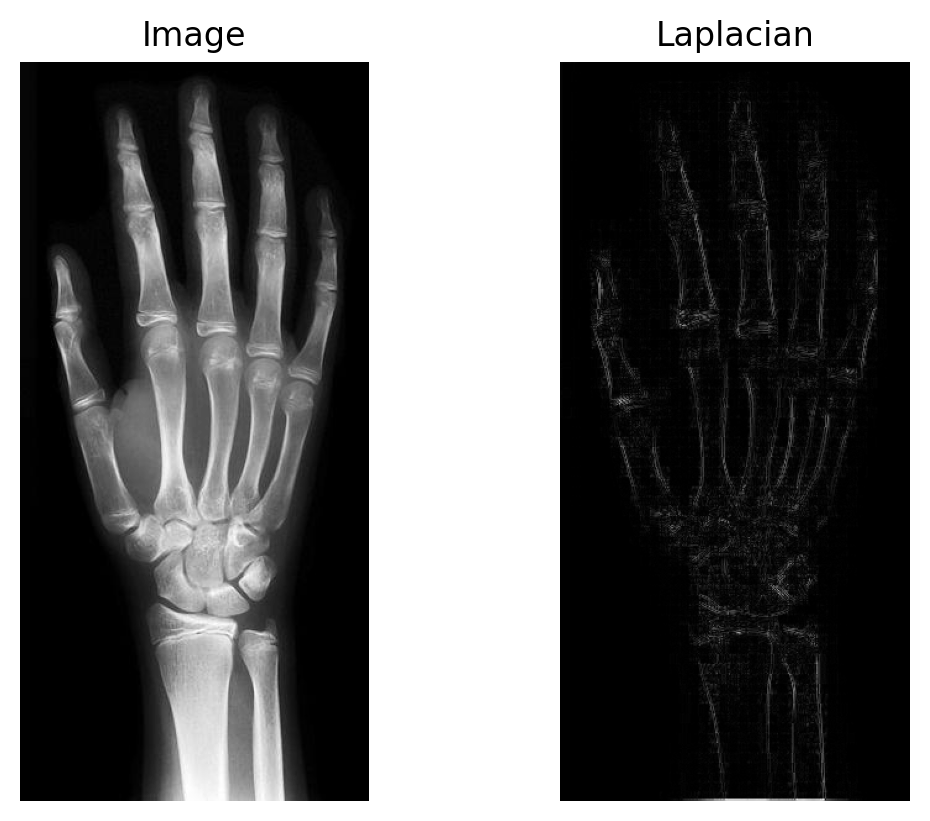

In [ ]:
laplacian_image = laplace(image)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.axis('off')
plt.title("Laplacian")
plt.show()

#Laboratorium 2 - Podstawowe operacje morfologiczne

Celem laboratorium jest zaznajomienie się oraz implementacja podstawowych operacji morfologicznych - dylatacji, erozji, zamknięcia, otwarcia, oraz podstawowych operacji na maskach binarnych.

Rozpocznijmy od wczytania bibliotek:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
%matplotlib inline

Napisz dwie funkcje, pierwszą, która będzie generować obraz binarny koła i drugą, która będzie generować obraz binarny prostokąta dla zadanych parametrów:

In [ ]:
# TO BYŁO NA KOLOSIE ROK TEMUUU


def generate_ciricle(x_size, y_size, x_origin, y_origin, radius):

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
	# TO DO
	pass

In [ ]:
def generate_ciricle(x_size, y_size, x_origin, y_origin, radius):
	image = np.zeros((y_size, x_size))

	for i in range(y_size):
		for j in range(x_size):
			if (j-x_origin)**2 + (i-y_origin)**2 <= radius*radius:
				image[i,j] = 1
			else:
				image[i,j] = 0
	return image

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
	image = np.zeros((y_size, x_size))
	image[y_b:y_b+height, x_b:x_b+width] = 1

	return image

Przykład użycia:

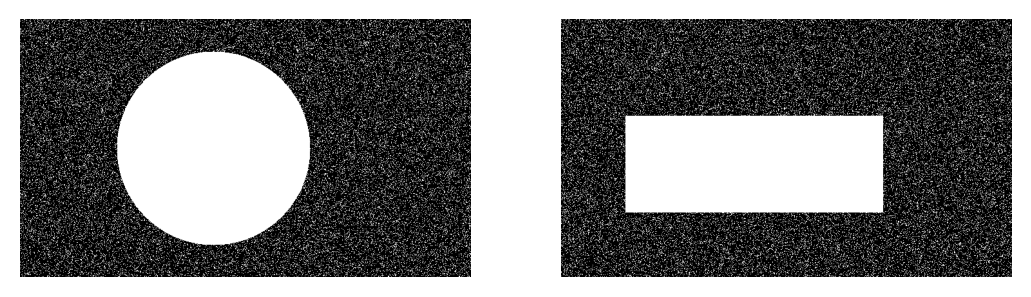

In [ ]:
x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_ciricle(x_size, y_size, x_origin, y_origin, radius)
rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

# Dodanie szumu do wizualizacji następnych funkcji
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

W kolejnym kroku zaimplementuj cztery podstawowe operacje morfologiczne z zadanym elementem strukturalnym: erozję, dylatację, otwarcie oraz zamknięcie. Uwaga: nie wykorzystuj funkcji bibliotecznych implementujących powyższe funkcje, zaimplementuj je samodzielnie.

In [ ]:
def erosion(image, se):
	# TO DO
	pass

def dilation(image, se):
	# TO DO
	pass

def opening(image, se):
	# TO DO
	pass

def closing(image, se):
	# TO DO
	pass

In [ ]:
# TO BYŁO NA KOLOSIE ROK TEMU


#EROZJA
def erosion(image, se):
	r,c=image.shape
	erosion_image=np.zeros((r,c))
	s=(se.shape[0]-1)//2
	for i in range(s,r-s):
		for j in range(s,c-s):
			kadr=image[i-s:i+s+1,j-s:j+s+1]
			img=kadr*se
			erosion_image[i,j]=np.min(img)
	return erosion_image

#DYLATACJA
def dilation(image, se):
	r,c=image.shape
	dilation_image=np.zeros((r,c))
	s=(se.shape[0]-1)//2
	for i in range(s,r-s):
		for j in range(s,c-s):
			kadr=image[i-s:i+s+1,j-s:j+s+1]
			img=kadr*se
			dilation_image[i,j]=np.max(img)
	return dilation_image

#OTWARCIE
def opening(image, se):
	new_img  = erosion(image, se)
	opened_img = dilation(new_img, se)
	return opened_img
	pass


#ZAMKNIĘCIE
def closing(image, se):
	new_img = dilation(image, se)
	closed_img = erosion(new_img, se)
	return closed_img
	pass


Przykładowy wynik poszczególnych operacji. Wyjaśnij działanie każdej z nich.Przykładowy wynik poszczególnych operacji. Wyjaśnij działanie każdej z nich.

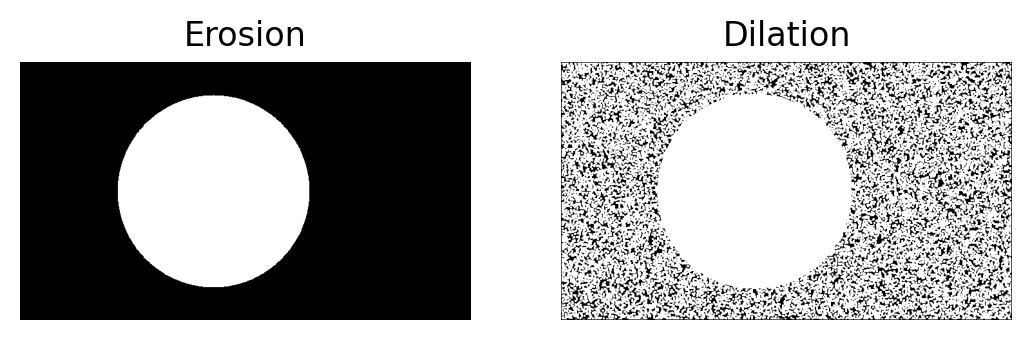

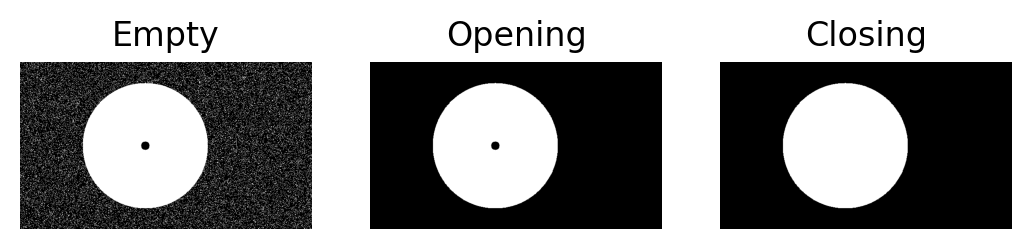

In [ ]:
eroded_circle = erosion(circle, np.ones((3, 3)))
dilated_circle = dilation(circle, np.ones((3, 3)))

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle))
opened_circle = opening(empty_circle, np.ones((3, 3)))
closed_opened_circle = closing(opened_circle, np.ones((21, 21)))
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

W ostatnim kroku, zastosuj odpowiednie operacje morfologiczne, aby wyznaczyć tzw. "zewnętrzną" oraz "wewnętrzną" krawędź maski binarnej. Dla łatwości wizualizacji wygenerujmy mniejszy okrąg.

In [ ]:
small_circle = generate_ciricle(64, 64, 32, 32, 8)

In [ ]:
outer_edge = None # TO DO
inner_edge = None # TO DO

In [ ]:
outer_edge = np.logical_and(nd.binary_dilation(small_circle, np.ones((3,3))), np.logical_not(small_circle))
inner_edge = np.logical_and(np.logical_not(nd.binary_erosion(small_circle, np. ones((3,3)))), small_circle)

#outer_edge = np.logical_xor(small_circle, nd.binary_dilation(small_circle))
#inner_edge = np.logical_xor(small_circle, nd.binary_erosion(small_circle))

Pożądany rezultat:

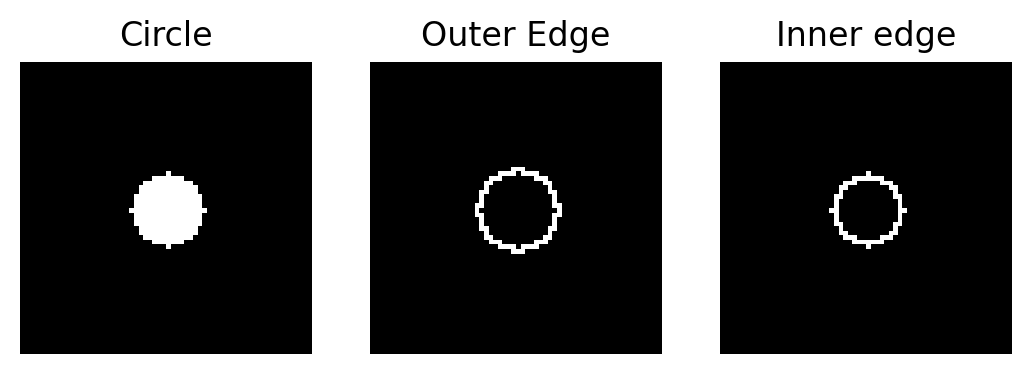

In [ ]:
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(small_circle, cmap='gray')
plt.axis('off')
plt.title("Circle")
plt.subplot(1, 3, 2)
plt.imshow(outer_edge, cmap='gray')
plt.axis('off')
plt.title("Outer Edge")
plt.subplot(1, 3, 3)
plt.imshow(inner_edge, cmap='gray')
plt.axis('off')
plt.title("Inner edge")
plt.show()

# Laboratorium 3 (Część I) - Histogram obrazu, transformacja Fouriera

W ramach laboratorium zostaną zaimplementowane podstawowe operacje na histogramie obrazu oraz zostanie wykorzystana transformacja Fouriera obrazu (sygnału 2D)

Zacznijmy od wczytania bibliotek oraz obrazu:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
%matplotlib inline

image = color.rgb2gray(io.imread("xray.png"))
image = (image - np.min(image)) / (np.max(image) - np.min(image))

Wyznaczmy i obliczmy histogram wczytanego obrazu. Zauważ, że histogram może zostać zwizualizowany w najróżniejszy sposób, nie tylko poprzez wykres słupkowy.

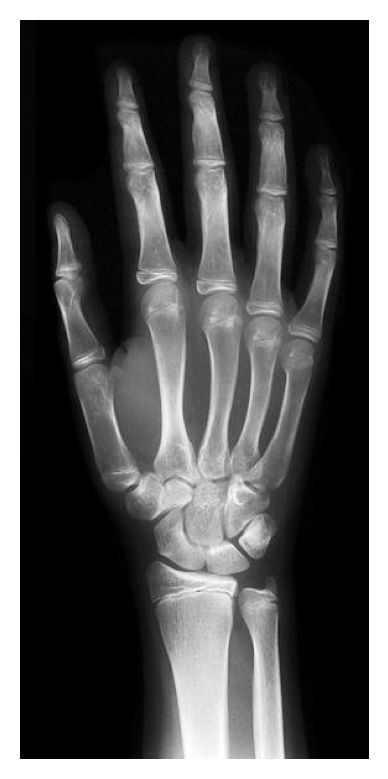

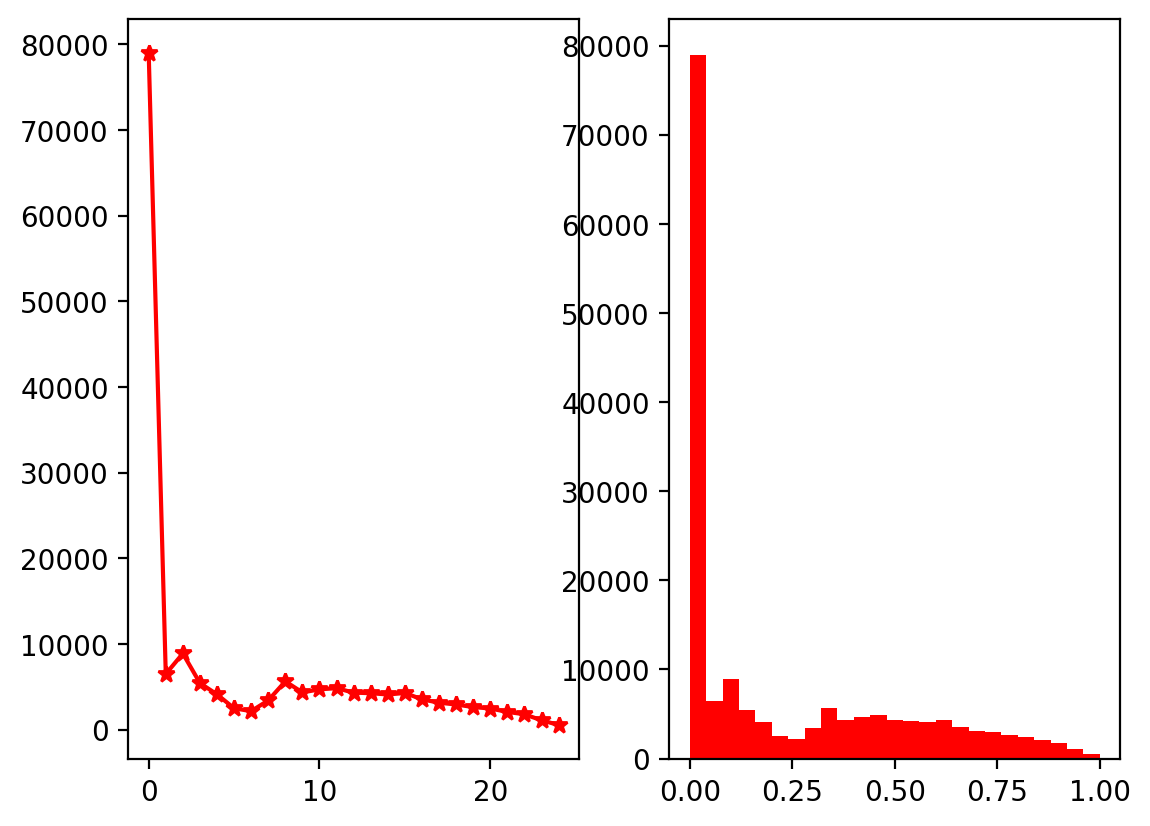

In [ ]:
no_bins = 25
np_histogram, _ = np.histogram(image.ravel(), bins=no_bins)

plt.figure(dpi=200)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.plot(np_histogram, "r*-")
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), color='red', bins=no_bins)
plt.show()

W pierwszym zadaniu napisz własną funckję do obliczania histogramu. Nie używaj gotowych funkcji wyznaczających histogram z żadnej z bibliotek.

In [ ]:
def our_hist(image, bins=100):
    pass
    # TO DO

In [ ]:
# TO BYŁO NA KOLOSIE ROK TEMU



def our_hist(image, bins=100):
  # TO DO
  unique,unique_counts=np.unique(image.ravel(),return_counts=True) #szukanie unikalnych elementów tablicy
  max_value,min_value=image.max(),image.min()
  diff=max_value-min_value
  histogram=np.zeros(bins)
  for i in range(len(histogram)):
    start_value=min_value+i*diff/bins
    end_value=min_value+(i+1)*diff/bins
    histogram[i]=np.sum(unique_counts[np.logical_and(unique>=start_value,unique<end_value)]) #suma wartości większych niż początkowy i mniejszych niż końcowy
    histogram[-1]+=unique_counts[-1]
  return histogram



Porównaj działanie zaimplementowanej funkcji do funkcji dostępnej w bibliotece numpy:

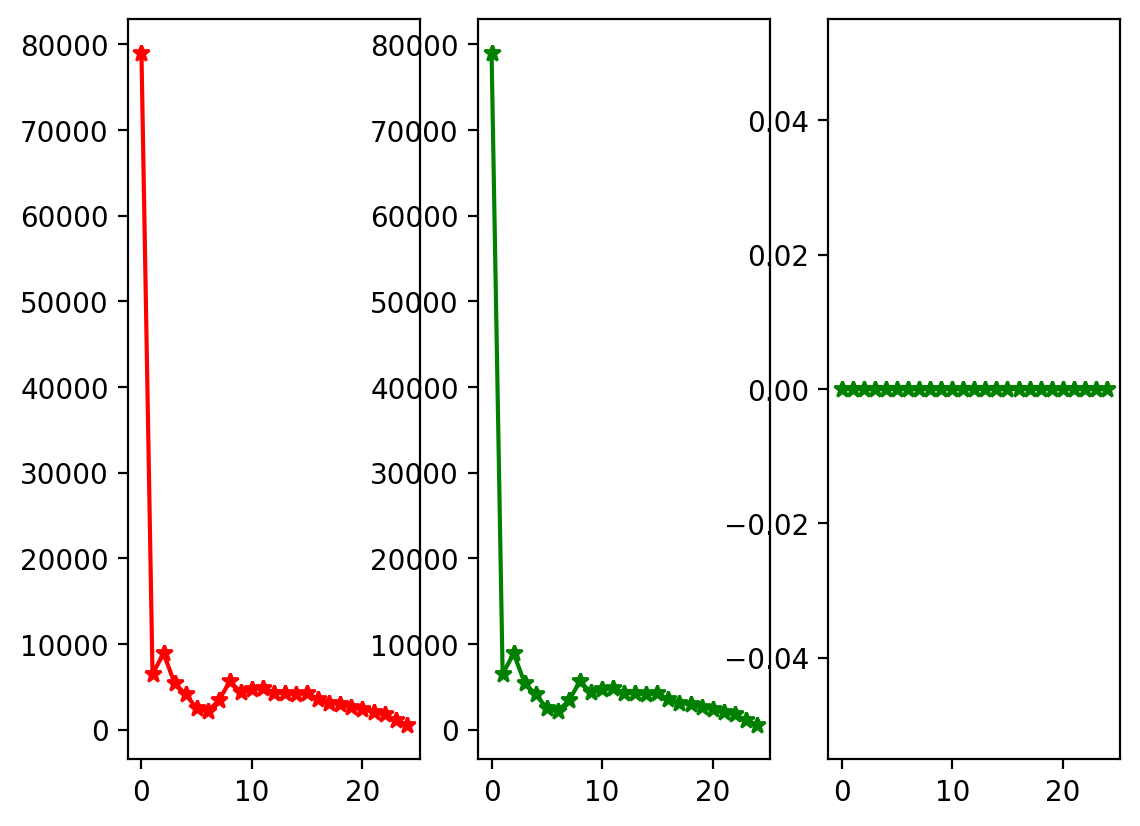

SAD:  0.0


In [ ]:
our_histogram = our_hist(image.ravel(), bins=no_bins)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.plot(np_histogram, "r*-")
plt.subplot(1, 3, 2)
plt.plot(our_histogram, "g*-")
plt.subplot(1, 3, 3)
plt.plot(np.abs(np_histogram.ravel() - our_histogram), "g*-")
plt.show()

print("SAD: ", np.sum(np.abs(np_histogram.ravel() - our_histogram)))

W kolejnym zadaniu napisz funkcję do wyrównania histogramu (bez użycia gotowej funkcji bibliotecznej).

In [ ]:
def histogram_equalization(image, bins=100):
    pass
	# TO DO

In [ ]:
def histogram_matching(image_1, image_2): # from image_1 to image_2
  # TO DO
  # Wyznaczyc histogramy obu obrazow (moga byc idealne)
  image_1_values, bins, image_1_counts = np.unique(image_1.flatten(), return_counts=True, return_inverse=True)
  image_2_values, image_2_counts = np.unique(image_2.flatten(), return_counts=True)
  # Policzyc dystrybunaty dla obu histogramow
  image_1_distr = np.cumsum(image_1_counts, dtype=np.float64) #dystrybuanty dla zliczeń /suma kumulacyjna
  image_2_distr = np.cumsum(image_2_counts, dtype=np.float64)
  # Dokonac interpolacji jednej dystrybuanty wykorzystujac druga dyst~
  interpolation = np.interp(image_1_distr, image_2_distr, image_2_values) #w punktach image_2_distr chcemy policzyc punkty image_1_distr dla wartosci image_2_values

  # Wykorzystujac histogram odpowiednio go zaindeksowac i dokonac reshapu
  matched_image = interpolation[bins].reshape(image_1.shape)
  return matched_image

Przykładowy rezultat:

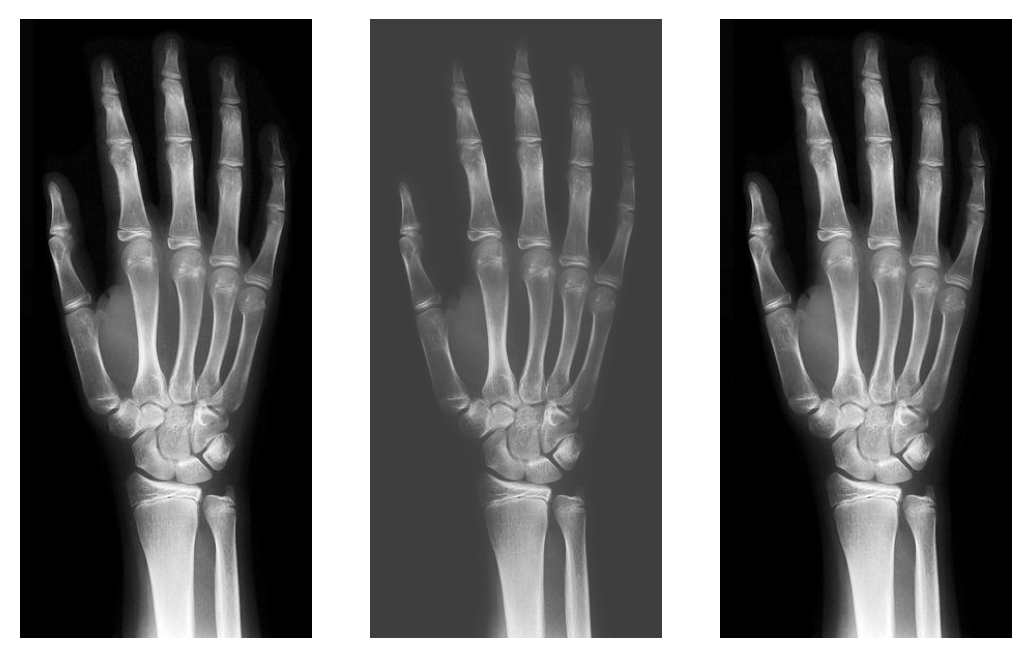

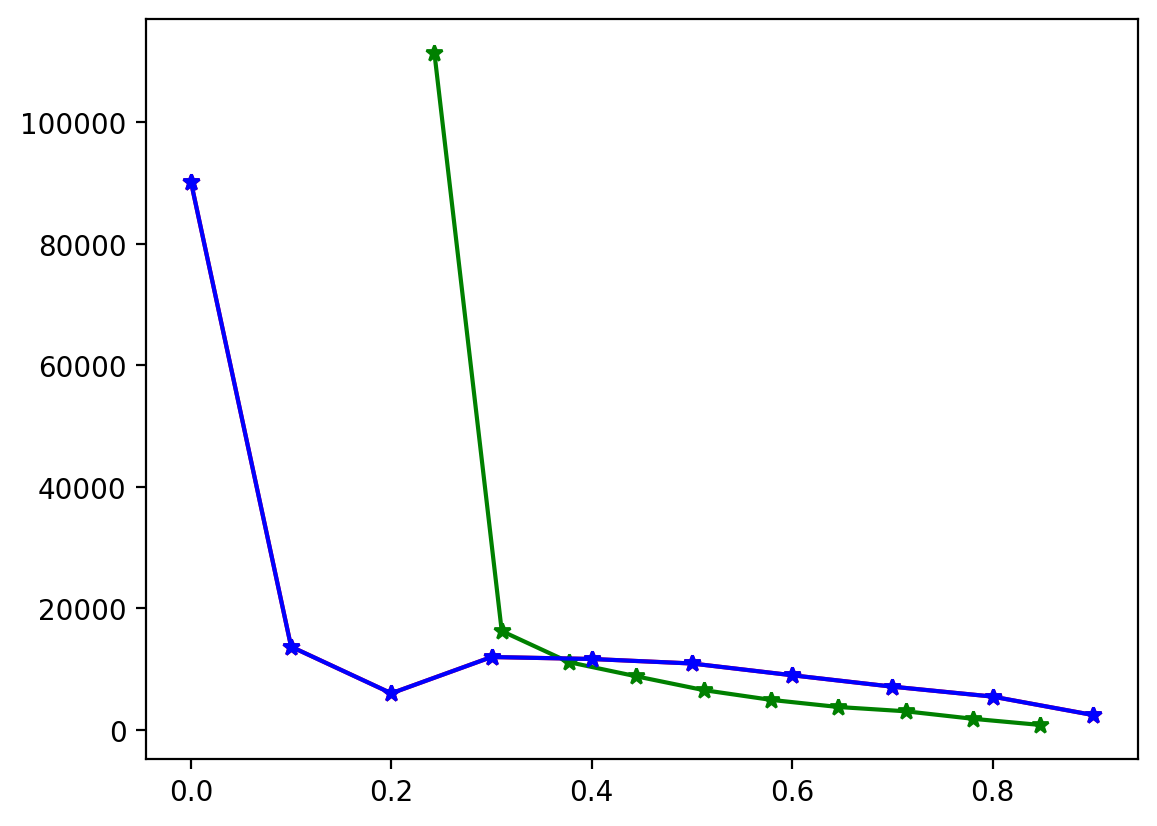

In [ ]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image))
new_image = 0.672*image**2 + 0.243
matched_image = histogram_matching(new_image, image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(matched_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

plt.figure(dpi=200)
hist, bins = np.histogram(image)
new_hist, new_bins = np.histogram(new_image)
matched_hist, matched_bins = np.histogram(matched_image)
plt.plot(bins[:-1], hist, "r*-")
plt.plot(new_bins[:-1], new_hist, "g*-")
plt.plot(matched_bins[:-1], matched_hist, "b*-")
# Histogram czerwony pokrywa się z niebieskim, co jest wynikiem oczekiwanym
plt.show()

Ciekawostka: dopasowanie histogramu jest bardzo prymitywną, globalną metodą korekcji/nakładania stylu. Obecnie metody poszły zdecydowanie "do przodu", np. stosowane są nieliniowe metody uczenia głębokiego, m.in. oparte o sieci generujące.
Polecam przeczytanie np. https://towardsdatascience.com/style-transfer-with-gans-on-hd-images-88e8efcf3716

Kolejnym zadaniem jest zastosowanie i wizualizacja transformacji Fouriera obrazu. Stosując gotowe funkcje biblioteczne dokonaj następujących transformacji:

In [ ]:
#image_fft # TO DO
#fft_mag # TO DO # Magnituda (w skali logarytmicznej) transformacji
#image_back  # TO DO # Transformacja odwrotna


In [ ]:
#mage_fft = To do


#fft_mag =  TO DO # Magnituda (w skali logarytmicznej) transformacji

# image_back = # TO DO # Transformacja odwrotna




ft = np.fft.ifftshift(image)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

fft_mag = np.sqrt(abs(ft))

ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
image_back = ift.real

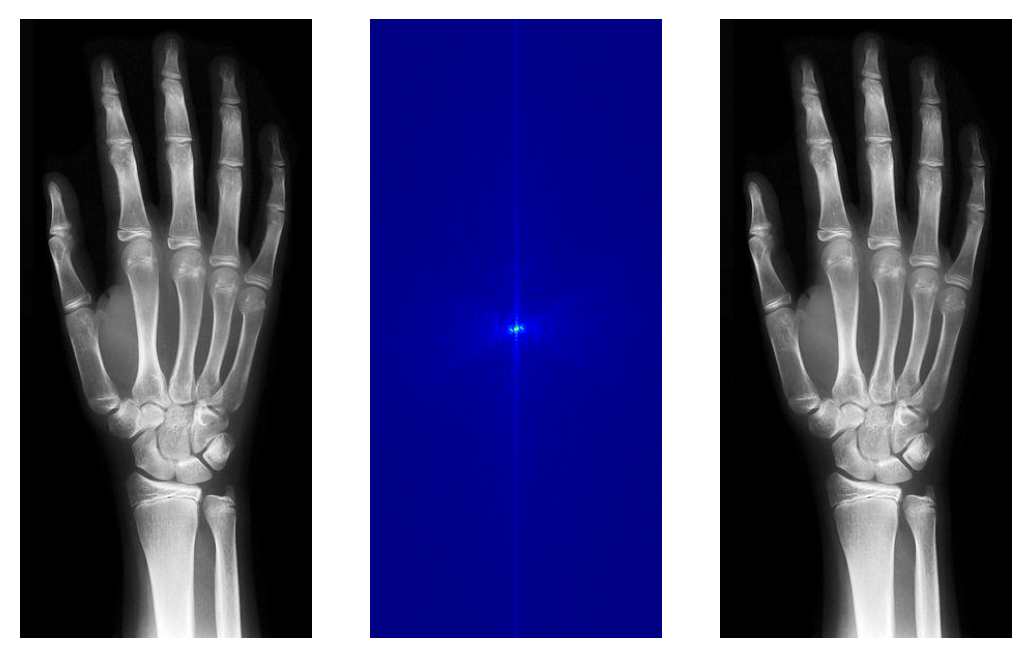

In [ ]:
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(fft_mag, cmap='jet')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_back, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()


Na koniec spróbuj tak zmodyfikować widmo by uzyskać rezultat podobny do poniższego. Wytłumacz intuicyjnie co się stało.

In [ ]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift
image_fft = np.fft.fft2(image)
fft_mag = 20*np.log(np.abs(image_fft))
 # TO DO # Magnituda (w skali logarytmicznej) transformacji
image_back = np.abs(ifft2(ifftshift(image_fft)))

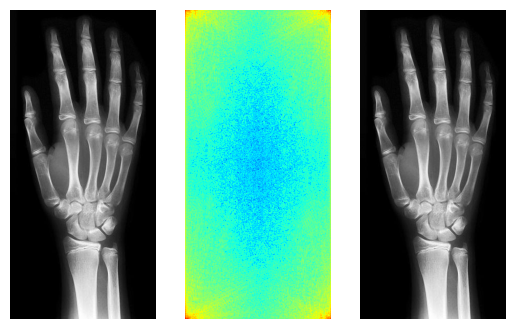

In [ ]:
plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(fft_mag, cmap='jet') #jet,fft_mag
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_back, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()


# Laboratorium 3 (Część II) - Podstawowe algorytmy segmentacji

W ramach laboratorium zostanie przedstawione progowanie oraz algorytmy rozrostu obszarów w wersji lokalnej oraz globalnej. Są to najbardziej podstawowe algorytmy segmetnacji pochodzące jeszcze z XX wieku. Wczytujemy przydatne biblioteki:

In [ ]:
import numpy as np
from scipy import ndimage
from skimage import color, io
import time
import matplotlib.pyplot as plt
import skimage.measure as measure
import queue # Do implementacji lokalnej wersji rozrostu obszarów
%matplotlib inline


Do testów przydatne będą dwa obrazy. Jeden syntentyczny, na podstawie którego łatwo można określić poprawność rozwiązania oraz obraz bliższy rzeczywistego. Na początku wczytajmy i pokażmy jeden z przekrojów CT płuc.

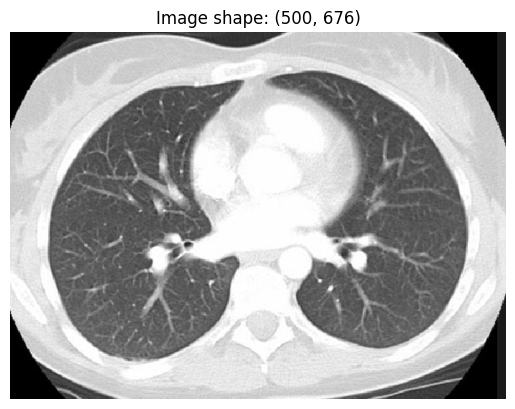

In [ ]:
def normalize(image):
    return (image - np.min(image))/(np.max(image) - np.min(image))

image  = normalize(color.rgb2gray(io.imread('CT_lungs.jpg')))
plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image shape: " + str(image.shape))
plt.show()

Następnie wygenerujmy obraz koła i dodajmy do niego losowy szum i znormalizujmy do zakresu [0, 1].

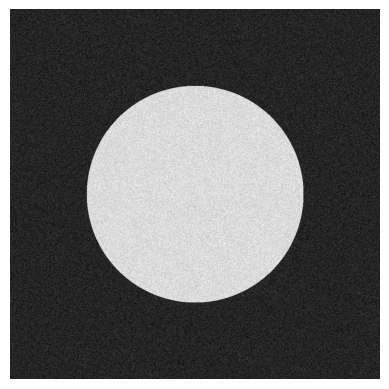

In [ ]:
def generate_circle(y_size, x_size, x_origin, y_origin, radius):
    image = np.zeros((y_size, x_size))
    x_grid, y_grid = np.meshgrid(np.arange(x_size), np.arange(y_size))
    indices = np.square((x_grid - x_origin)) + np.square((y_grid-y_origin)) < radius*radius
    image[indices] = 1
    return image

y_size = 1024
x_size = 1024z
circle = generate_circle(y_size, x_size, 512, 512, 300)
circle = circle + (np.random.random((y_size, x_size))-0.5)*0.4
circle = normalize(circle)

plt.figure()
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.show()

Najbardziej podstawowym algorytmem segmentacji jest progowanie polegające na uzyskaniu maski binarnej w miejscach wartości, które znajdują się w podanym zakresie. Napisz funkcję (0.5p):

In [ ]:
def image_threshold(image, lower, upper):
    # TO DO
    return np.zeros(image.shape)

In [ ]:
#progowanie
#podobne intensywnosci moga byc w roznych obszarach naszego obrazu, więc troche lipne to progowanie globalne
#-> potrzebujemy rozrostu obszaru (czyli lokalne progowanie)

def image_threshold(image, lower, upper):
    # TO DO
    return np.logical_and(image > lower, image < upper)

Która jako argumenty przyjmuje obraz, dolną oraz górną wartość progu. Przykładowy wynik działania algorytmu został pokazany poniżej.

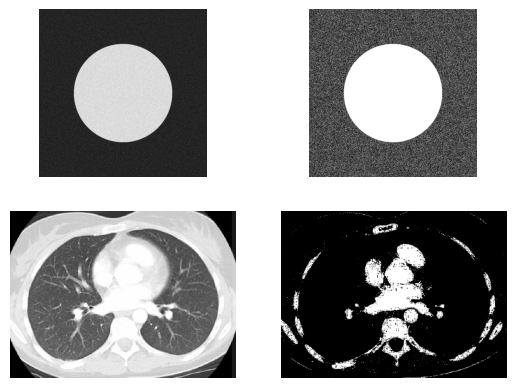

In [ ]:
circle_thresholded = image_threshold(circle, 0.2, 1)
image_thresholded = image_threshold(image, 0.95, 1)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(circle_thresholded, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(image_thresholded, cmap='gray')
plt.axis('off')
plt.show()

Kolejnym algorytmem do implementacji jest algorytm rozrostu obszarów w wersji globalnej (do implementacji, 1p, podpowiedź: wykorzystaj funkcje label z skimage.measure)

In [ ]:
def region_growing_global(image, seed, bottom_threshold, upper_threshold):
    # TO DO
    """
    0) image[seed] - bottom_threshold, image[seed] + upper_threshold
    1) Wyznaczyc wszystkie wartosci w calym obrazie, ktore spelniaja prog
    2) Pogrupowac wszystkie wartosci spelniajce prog i sprawdzic, ktore sa polaczone z koordynatem: seed (skimage -> measure -> label)
    """
    segmentation_result = np.zeros(image.shape)
    return segmentation_result

Załóżmy, że w obu przypadkach jako punkt startowy chcemy wybrać środek obrazu i że interesują nas wartości maksymalnie o 0.1 różne od punktu początkowego.

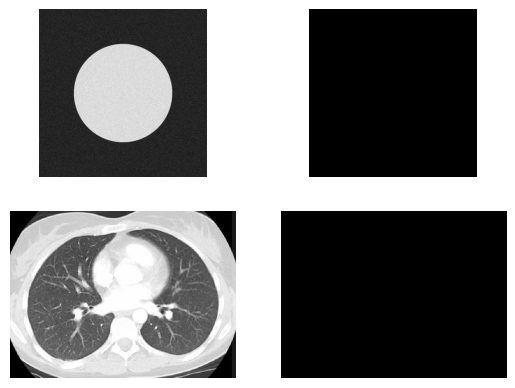

In [ ]:
get_center = lambda image: (int(image.shape[0] / 2) - 1, int(image.shape[1] / 2) - 1)
circle_region_global = region_growing_global(circle, get_center(circle),  0.1, 0.1)
image_region_global = region_growing_global(image, get_center(image), 0.1, 0.1)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(circle_region_global, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(image_region_global, cmap='gray')
plt.axis('off')
plt.show()

Ostatnim algorytmem do implementacji jest algorytm rozrostu obszarów w wersji lokalnej (do implementacji, 1p, podpowiedź: poczytaj o algorytmie Dijkstry i odpowiednio go zmodyfikuj, przyda się biblioteka queue oraz set jako struktura danych).

In [ ]:
# W region_growing_local kolejność odwrócona, czyli iterujemy od początku seeda i po kolei lokalnie dokonujemy progowania poszczególnych pikseli

def region_growing_local(image, seed, bottom_threshold, upper_threshold):


    """
    0) image[seed] - bottom_threshold, image[seed] + upper_threshold
    1) Iteracyjnie nalezy sprawdzic sasiadow seed czy spleniaja prog:
        1a) Jezeli tak: Dodac do kolejki i powtorzyc dla nich operacje:
            1a1): Dodac do zbioru wartosci odwiedzonych
            1ab): Dodac aktualna wartosc jako spelniajaca kryterium (image[dana_wartosc] = 1)
        1b) Jezeli nie: Nie dodawac do kolejki
            1b1): Dodac do zbioru wartosci odwiedzonych
  """

    value = image[seed]
    high_threshold = value + upper_threshold
    low_threshold = value - bottom_threshold

    # analiza grafów wykorzystywana
    pixel_queue = queue.Queue() #do tego pixel_queue będziemy dodawać kolejne piksele, któe spełniają warunek progu
    visited = set() #do visited będziemy dodawać te koordynaty, które już odwiedzieliśmy
    y_size, x_size = image.shape
    def get_neighbours(coordinate): #chcemy sprawdzić sąsiedztwo naszego koordynatu
        # TO DO
        indicies = [-1, 0, 1] #maksymalne indeksy, które chcemy sprawdzać, będą w każdym kierunku
        results = list()  #lista do której dodamy parę koordynatów (koordynaty sąsiada z pętli for niżej)
        for x in indicies:  #iterujemy po tym, chcemy wyznaczyć jakiegos sąsiada po x i sąsiada po y
            for y in indicies:
                #możemy przez przypadek wyjść poza obraz z którejś ze stron, dlatego chcemy wartość minimalną z tej wartości oraz jakiejś wartości obrazu (y_size lub x_size)
                x_index = max(min(coordinate[1] + x, x_size - 1), 0) #koordynat pierwszy + x
                y_index = max(min(coordinate[0] + y, y_size - 1), 0) # [0], ponieważ zaczynamy indeksować od y
                results.append((y_index, x_index))  #dodajemy koordynaty sąsiada do listy
        return results

    segmentation_image = np.full(np.shape(image), False)
    pixel_queue.put(seed) #pierwszy element dodawany do kolejki to koordynat seeda
    while not pixel_queue.empty():  #w petli while tak długo iterujemy, jak długo ta kolejka nie jest pusta; Jeżeli będzie pusta to znaczy, że kolejny sąsiad nie spełnia już wartości progu i kończymy działanie pętli
        # TO DO
        cc = pixel_queue.get() #cc -> obecny koordynat; wyciągamy z kolejki jakiś element
        cv = image[cc]  # obecna wartość; wartość obrazu w punkcie cc (do kolejki dodajemy koordynaty obrazu, czyli pary (y,x))
        #sprawdzamy warunek:
        if cv > low_threshold and cv < high_threshold:
            segmentation_image[cc] = True
        else:
            continue
        #wyznaczamy sąsiadów koordynatu obecnego cc:
        neighbours = get_neighbours(cc) #neighbours zawiera koordynaty sąsiada piksela cc
        #iteracja po sąsiadach:
        for neighbour in neighbours:  #chcemy dodać sąsiada do kolejki
            if neighbour in visited:  #jeżeli ten sąsiad był już odwiedzony to chcemy kontynuować
                continue
            else: #jeżeli nie, to chcemy go dodać do kolejki
                pixel_queue.put(neighbour)
                visited.add(neighbour)  #jednocześnie chcemy go dodać do visited

    return segmentation_image

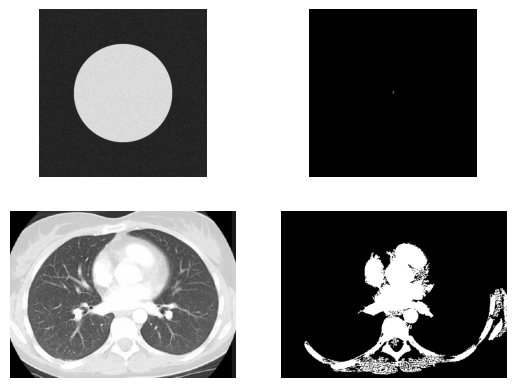

In [ ]:
get_center = lambda image: (int(image.shape[0] / 2) - 1, int(image.shape[1] / 2) - 1)
circle_region_local = region_growing_local(circle, get_center(circle),  0.1, 0.1)
image_region_local = region_growing_local(image, get_center(image), 0.1, 0.1)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(circle_region_local, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(image_region_local, cmap='gray')
plt.axis('off')
plt.show()

Porównajmy czas wykonywania obu wersji algorytmu dla różnych wielkości okręgu.

In [ ]:
y_size, x_size = 2048, 2048
values = [16, 32, 64, 128, 256]
times = []
for value in values:
    current_circle = generate_circle(y_size, x_size, 1024, 1024, value)
    b_t = time.time()
    _ = region_growing_local(current_circle, get_center(current_circle), 0.1, 0.1)
    e_t = time.time()
    print("Time for local version, radius: ", value, ": ", e_t - b_t)
    b_t = time.time()
    _ = region_growing_global(current_circle, get_center(current_circle), 0.1, 0.1)
    e_t = time.time()
    print("Time for global version, radius: ", value, ": ", e_t - b_t)


Time for local version, radius:  16 :  0.03937721252441406
Time for global version, radius:  16 :  6.270408630371094e-05
Time for local version, radius:  32 :  0.22144246101379395
Time for global version, radius:  32 :  5.054473876953125e-05
Time for local version, radius:  64 :  0.5775411128997803
Time for global version, radius:  64 :  7.867813110351562e-05
Time for local version, radius:  128 :  1.3255631923675537
Time for global version, radius:  128 :  6.723403930664062e-05
Time for local version, radius:  256 :  2.8161027431488037
Time for global version, radius:  256 :  5.2928924560546875e-05


Dlaczego algorytm w wersji lokalnej jest szybszy dla małych obiektów? Dlaczego czas obliczeń dla algorytmu w wersji globalnej nie jest zależny od wielkości obiektu? Który algorytm byłby w obecnych czasach bardziej praktyczny i dlaczego? (0.5p)

Miejce na odpowiedź:

# Laboratorium 4 (Część I) - Podstawowe transformacje geometryczne

W ramach laboratorium zostaną zaimplementowane podstawowe sposoby transformacji geomerycznych obrazu: transformacja sztywna oraz transformacja oparta o tzw. gęste pole deformacji. Zostanie również zaimplementowana własna funkcja do interpolacji dwuliniowej.

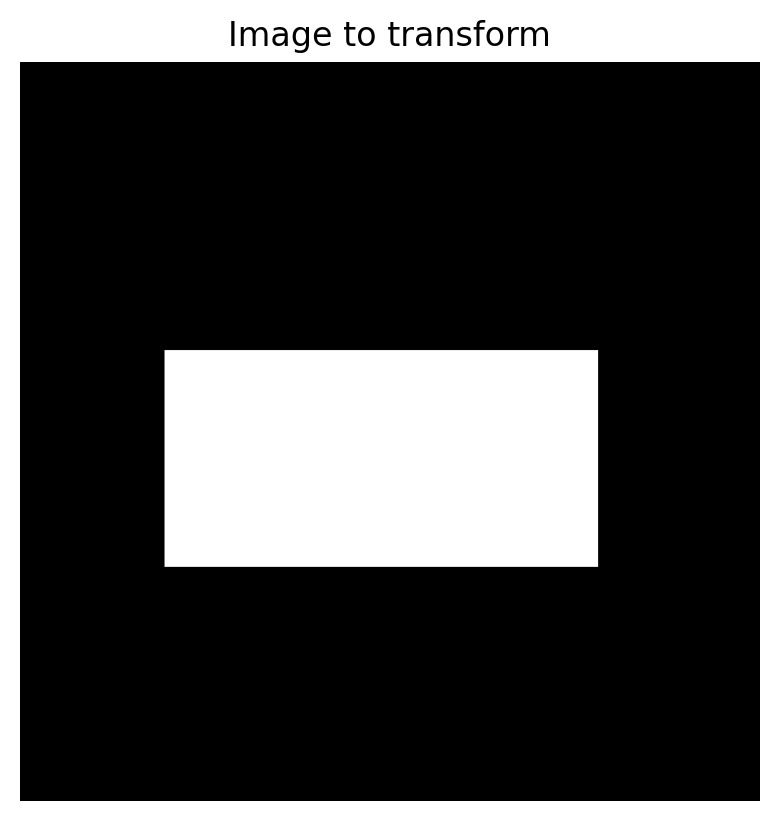

In [ ]:
import numpy as np
from scipy import ndimage as nd
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
%matplotlib inline

y_size, x_size = 1024, 1024
image = np.zeros((y_size, x_size))
image[400:700, 200:800] = 1
plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image to transform")
plt.show()

Pierwszym zadaniem jest implementacja funkcji generującej macierz transformacji sztywnej (0.5p). Przyjmij, żę generujemy macierz homogeniczną 3x3, a nie oddzielną macierz rotacji i wektor translacji.

In [ ]:
def gen_rigid_matrix(xt, yt, rot):
    """
    xt - translacja po kolumnach
    yt - translacja po wierszach
    rot - rotacja (w stopniach)
    """
    # TO DO
    return np.zeros((3, 3))

In [ ]:
# TO BYŁO NA KOLOSIE ROK TEMU


def gen_rigid_matrix(xt, yt, rot):

    rot = rot * np.pi / 180 #zmiana stopni na radiany
    rigid_matrix = np.array([
      [np.cos(rot), -np.sin(rot), xt],
      [np.sin(rot), np.cos(rot), yt],
      [0, 0, 1]
      ])

    return rigid_matrix

Przykładowy wynik działania funkcji:

In [ ]:
rigid_matrix = gen_rigid_matrix(50, 50, 45)
print("Rigid matrix: ")
print(rigid_matrix)

Rigid matrix: 
[[ 0.70710678 -0.70710678 50.        ]
 [ 0.70710678  0.70710678 50.        ]
 [ 0.          0.          1.        ]]


Kolejnym krokiem jest implementacja funkcji do transformacji sztywnej (1p).

Funkcja będzie potrzebowała dwóch funkcji pomocnicznych:

1) Funkcji, która będzie modyfikować wygenerowaną macierz transformacji tak, aby następowała ona względem środka obrazu.

2) Funkcji, która dokona transformacji geometrycznej koordynatów korzystając z wycentrowanej macierzy transformacji sztywnej.

Na ten moment do interpolacji wykorzystaj gotową funkcje z pakietu scipy.ndimage.

In [ ]:
def center_matrix(transform, x_size, y_size):
    """
    transform - macierz transformacji sztywnej (3x3)
    x_size - liczba kolumn obrazu
    y_size = liczba wierszy obrazu

    # TO DO
    return np.zeros((3, 3))
    def rigid_dot(grid_x, grid_y, transform):

    grid_x - siatka po kolumnach (YxX)
    grid_y - siatka po wierszach (YxX)
    transform - macierz transformacji sztywnej (3x3)

    # TO DO
    return grid_x, grid_y
    def rigid_transform(image, transform):

    image - obraz do transformacji (YxX)
    transform - macierz transformacji sztywnej (3x3)
    """
    # TO DO
    transformed_image = image
    return transformed_image


In [ ]:

#TO BYŁO NA KOLOSIE ROK TEMU



def center_matrix(transform, x_size, y_size):
    x_origin = (x_size / 2)
    y_origin = (y_size / 2)


    array_1 = np.array([
      [1, 0, x_origin],
      [0, 1, y_origin],
      [0, 0, 1]
    ])

    array_2 = np.array([
      [1, 0, -x_origin],
      [0, 1, -y_origin],
      [0, 0, 1]
    ])

    center_matrix = array_1 @ transform @ array_2
    # @ - mnożenie macierzowe - operator
    return center_matrix

    """
    transform - macierz transformacji sztywnej (3x3)
    x_size - liczba kolumn obrazu
    y_size = liczba wierszy obrazu
    """
    # TO DO
    return np.zeros((3, 3))

In [ ]:
def rigid_dot(grid_x, grid_y, transform):


  coordinates = np.array([grid_x.ravel(), grid_y.ravel(), np.ones(grid_x.size)])
   #pierwszy wiersz same x, drugi wiersz same y,
   #trzeci wiersz macierz jedynek; ravel() - przekształca obraz z 2D na 1D
  new_coordinates = transform @ coordinates
  grid_x = new_coordinates[0,:].reshape(grid_x.shape)
  grid_y = new_coordinates[1,:].reshape(grid_y.shape)
  """
    grid_x - siatka po kolumnach (YxX)
    grid_y - siatka po wierszach (YxX)
    transform - macierz transformacji sztywnej (3x3)
  """
    # TO DO
  return grid_x, grid_y

In [ ]:
def rigid_transform(image, transform):
  transform = center_matrix(transform, x_size, y_size)
  grid_x, grid_y = np.meshgrid(np.arange(x_size), np.arange(y_size))
  new_grid_x, new_grid_y = rigid_dot(grid_x, grid_y, transform)
  transformed_image = nd.map_coordinates(image, [new_grid_x, new_grid_y])

  return transformed_image



Wyniki działania poszczególnych kroków:

Przektszałcenie macierzy względem środka obrazu:

In [ ]:
centered_matrix = center_matrix(rigid_matrix, x_size, y_size)
print("Centered rigid matrix: ")
print(centered_matrix)

Centered rigid matrix: 
[[   0.70710678   -0.70710678  562.        ]
 [   0.70710678    0.70710678 -162.07734394]
 [   0.            0.            1.        ]]


Transformacja koordynatów za pomocą macierzy sztywnej:

In [ ]:
grid_x = np.array([
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2]
])
grid_y = np.array([
    [0, 0, 0],
    [1, 1, 1],
    [2, 2, 2]
])
temp_transform = np.array([
    [1, 0, 1],
    [0, 1, -1],
    [0, 0, 0]
])

new_grid_x, new_grid_y = rigid_dot(grid_x, grid_y, temp_transform)
print("Transformed grids: ")
print(new_grid_x)
print(new_grid_y)

Transformed grids: 
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


Rezultat transformacji sztywnej:

In [ ]:
transformed_image = rigid_transform1(image, rigid_matrix)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray", vmin=0, vmax=1)
plt.axis('off')
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap="gray", vmin=0, vmax=1)
plt.axis('off')
plt.title("Transformed Image")
plt.show()

NameError: ignored

Kolejnym zadaniem jest implementacja własnej funkcji do interpolacji dwuliniowej (1p). Nie korzystaj z gotowych funkcji do interpolacji. Napisz funkcje samodzielnie korzystając jedynie z podstawowych operacji.

In [ ]:
def interpolate_2d(image, grid_x, grid_y):
    """
    image - obraz do interpolacji (YxX)
    grid_x - siatka kolumn (YxX)
    grid_y - siatka wierszy (YxX)
    """
    # TO DO
    return image

Po implementacji zastąp funkcje do interpolacji wykorzystaną w wcześniejszej wersji funkcji rigid_transform. Wynik powinien być identyczny.

In [ ]:
def interpolate_2d(image, grid_x, grid_y):
    """
    image - obraz do interpolacji (YxX)
    grid_x - siatka kolumn (YxX)
    grid_y - siatka wierszy (YxX)
    """
    # TO DO
    return image

In [ ]:
def interpolate_2d(image, grid_x, grid_y):
  img_y, img_x = image.shape[0], image.shape[1]
  new_img = np.zeros([img_y, img_x])

  grid_x =grid_x.ravel()
  grid_y= grid_y.ravel()

  for i in grid_y:
    for j in grid_x:

      y_up, y_down = np.int(np.floor(i)), np.int(np.floor(i)+ 1)
      x_left, x_right = np.int(np.floor(j)), np.int(np.floor(j) + 1)

      a = image[y_up, x_left]
      b = image[y_up, x_right]
      c = image[y_down, x_left]
      d = image[y_down, x_right]

      w_x = j - x_left
      w_y = i - y_up

      wA = (1 - w_x) * (1 - w_y)
      wB =  w_x * (1 - w_y)
      wC = w_y * (1 - w_x)
      wD = w_x * w_y

      interpolated_point = a*wA + b*wB + c*wC + d*wD
      new_img[x_left][y_up] = interpolated_point
  return new_img

In [ ]:
def rigid_transform_my_interpolation(image, transform):
    """
    image - obraz do transformacji (YxX)
    transform - macierz transformacji sztywnej (3x3)
    """
    # TO DO
    transform = center_matrix(transform, x_size, y_size)
    grid_x, grid_y = np.meshgrid(np.arange(x_size), np.arange(y_size))
    new_grid_x, new_grid_y = rigid_dot(grid_x, grid_y, transform)
    transformed_image = nd.map_coordinates(image, [new_grid_x, new_grid_y])

    return transformed_image

In [ ]:
transformed_image = rigid_transform(image, rigid_matrix)
transformed_image_my_interpolation = rigid_transform_my_interpolation(image, rigid_matrix)
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(transformed_image, cmap="gray", vmin=0, vmax=1)
plt.axis('off')
plt.title("Transformed Image 1")
plt.subplot(1, 3, 2)
plt.imshow(transformed_image_my_interpolation, cmap="gray", vmin=0, vmax=1)
plt.axis('off')
plt.title("Transformed Image 2")
plt.subplot(1, 3, 3)
plt.imshow(np.abs(transformed_image - transformed_image_my_interpolation), cmap="gray", vmin=0, vmax=1)
plt.axis('off')
plt.title("Difference")
plt.show()

ValueError: ignored

Ostatnim zadaniem jest implementacja funkcji do transformacji lokalnej (0.5p). Zaimplementuj funkcję (wykorzystaj własną funkcję do interpolacji) i wygeneruj losowe pole przemieszczeń, np:

In [ ]:
def local_transform(image, u_x, u_y):
    """
    image - obraz do transformacji (YxX)
    u_x - pole przemieszczeń po kolumnach (YxX)
    u_y - pole przemieszczeń po wierszach (YxX)
    """
    # TO DO
    return image

In [ ]:
def local_transform(image, grid_x, grid_y):
    """
    Wykonuje lokalne przekształcenie obrazu na podstawie siatki punktów.
    :param image: obraz wejściowy
    :param grid_x: macierz x-owych współrzędnych punktów siatki
    :param grid_y: macierz y-owych współrzędnych punktów siatki
    :return: przekształcony obraz
    """
    height, width = image.shape[:2]
    transformed_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            # Pobranie współrzędnych punktu siatki najbliższego do aktualnego piksela
            grid_x_nearest = int(grid_x[y, x])
            grid_y_nearest = int(grid_y[y, x])

            # Wyznaczenie różnicy między współrzędnymi piksela a najbliższego punktu siatki
            dx = grid_x[y, x] - grid_x_nearest
            dy = grid_y[y, x] - grid_y_nearest

            # Wyznaczenie indeksów czterech sąsiednich punktów siatki
            x1 = min(max(grid_x_nearest, 0), width - 1)
            y1 = min(max(grid_y_nearest, 0), height - 1)
            x2 = min(x1 + 1, width - 1)
            y2 = min(y1 + 1, height - 1)

            # Interpolacja dwuliniowa
            transformed_image[y, x] = (1 - dx) * (1 - dy) * image[y1, x1] + \
                                      dx * (1 - dy) * image[y1, x2] + \
                                      (1 - dx) * dy * image[y2, x1] + \
                                      dx * dy * image[y2, x2]

    return transformed_image

In [ ]:
np.random.seed(5)
u_x, u_y = np.random.randn(y_size, x_size)*250, np.random.randn(y_size, x_size)*250
u_x, u_y = nd.gaussian_filter(u_x, 5), nd.gaussian_filter(u_y, 5)
nonrigid_transformed_image = local_transform(image, u_x, u_y)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray", vmin=0, vmax=1)
plt.axis('off')
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(nonrigid_transformed_image, cmap="gray", vmin=0, vmax=1)
plt.axis('off')
plt.title("Transformed Image")
plt.show()


#Laboratorium 4 (Część II) - Detekcja krawędzi, Algorytm Canny'ego

W ramach laboratorium zostanie zaimplementowany jeden z najbardziej znanych algorytmów detekcji krawędzi - Algorytm Canny'ego. Zacznijmy od importu przydatnych bibliotek oraz wygenerowania syntetycznego obrazu.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage import feature
from scipy import ndimage as nd
import queue
%matplotlib inline

y_size, x_size = 256, 256
image = np.zeros((y_size, x_size))
image[100:200, 100:200] = 1
image = image + np.random.randn(y_size, x_size)*0.02

Algortym Canny'ego jest zaimplementowany w bibliotece skimage.

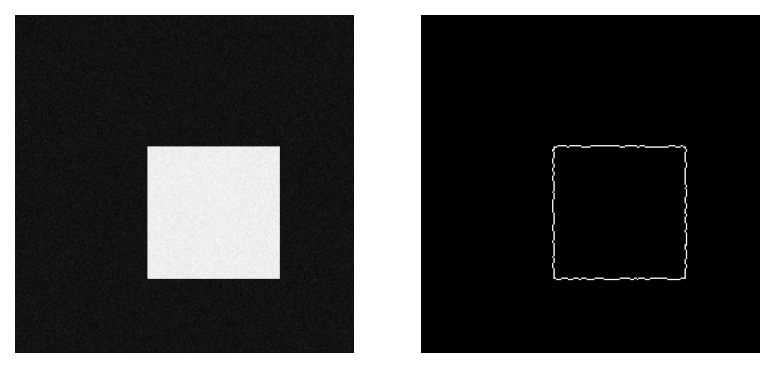

In [ ]:
skimage_canny = feature.canny(image)
plt.figure(dpi=150)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(skimage_canny, cmap='gray')
plt.axis('off')
plt.show()


Celem laboratorium jest samodzielna implementacja przedstawionego algorytmu. Uwaga: wyniki mogą różnić się od przedstawionych powyżej w zależności od przyjętych założeń i wewnętrznej implementacji filtracji Gaussa oraz doboru progu dolnego po algorytmie Otsu. Szkielet funkcji będzie wyglądać następująco:

In [ ]:
def canny(image, sigma=1.0):
    """
    1) Dokonaj filtracji obrazu filtrem Gaussa o zadanej sigmie
    2) Wyznacz przybliżenie gradientu (jego magnitude oraz kąt) za pomocą filtru Sobela
    3) Przeprowadź "non_maximum_supression" korzystając z magnitudy i kąta gradientu, wyznaczając tym samym potencjalnie krawędzie.
    4) Dokonaj podwójnego progowania potencjalnych krawędzi aby wyznaczyć krawędzie silne oraz krawędzie słabe.
    5) Przeproważ histerezę krawędzi, zwróć wynik.
    """
    edges = None
    return None

In [ ]:
def canny(image, sigma=1.0):
    """
    Implementacja algorytmu Canny do detekcji krawędzi.
    :param image: obraz wejściowy
    :param sigma: wartość sigmy dla filtru Gaussa (domyślnie 1.0)
    :return: wynikowa mapa krawędzi
    """

    # 1) Filtracja obrazu filtrem Gaussa o zadanej sigmie
    blurred_image = gaussian_filter(image, sigma)

    # 2) Wyznaczenie przybliżenia gradientu (magnituda i kąt) za pomocą filtru Sobela
    gradient_magnitude, gradient_angle = sobel_filter(blurred_image)

    # 3) Tłumienie niemaksimum przy wykorzystaniu magnitudy i kąta gradientu,
    #    wyznaczanie potencjalnych krawędzi
    potential_edges = non_maximum_suppression(gradient_magnitude, gradient_angle)

    # 4) Podwójne progowanie potencjalnych krawędzi
    strong_edges, weak_edges = double_thresholding(potential_edges)

    # 5) Przeprowadzenie histerezy krawędzi
    edges = edge_hysteresis(strong_edges, weak_edges)

    return edges

In [ ]:
def gaussian_smoothing(image, sigma):
    """
    TO DO - dokonaj filtracji image za pomoca filtru Gaussa o zadanej sigmie (wielkość filtru według konwencji - zazwyczaj przyjmuje się 2.54*sigma zaokrąglone do najbliższej nieparzystej      wartości w górę, chociaż równie dobrze może to być oddzielny, opcjonalny parametr)
    0.5p

    return np.zeros(image.shape)

def calculate_gradients(image):

    TO DO - Funkcja powinna zwrócić magnitude i kąt gradientu
    0.5p

    gradient_magnitude = np.zeros(image.shape)
    gradient_angle = np.zeros(image.shape)
    return gradient_magnitude, gradient_angle

    def otsu_threshold(image):

    TO DO - automatycznie wyznacz próg górny implementująć algorytm Otsu
    0.5p

    threshold = 0
    return threshold

def double_threshold(potential_edges, gradient_magnitude):

    TO DO  - podwójne progowanie wyznaczające krawędzie słabe poraz krawędzie mocne. Wyznacz próg górny korzystajac z otsu_threshold, a próg dolny poprzez podzielenie progu górnego przez 3
    0.5p

    strong_edges = np.zeros(gradient_magnitude.shape)
    weak_edges = np.zeros(gradient_magnitude.shape)
    return strong_edges, weak_edges

def edge_hysteresis(strong_edges, weak_edges):

    TO DO - dokonaj histerezy krawędzi silnych i słabych. Powinny pozostać tylko krawędzie silne oraz te krawędzie słabe, które są połączone z jakąkolwiek krawędzią silną (również przez krawędź słabą)
    0.5p
    Wskazówka: Funkcja będzie niemal identyczna z algorytmem rozrostu obszarów w wersji lokalnej z poprzedniego laboratorium

    edges = np.zeros(strong_edges)
    return edges
'''



SyntaxError: ignored

4


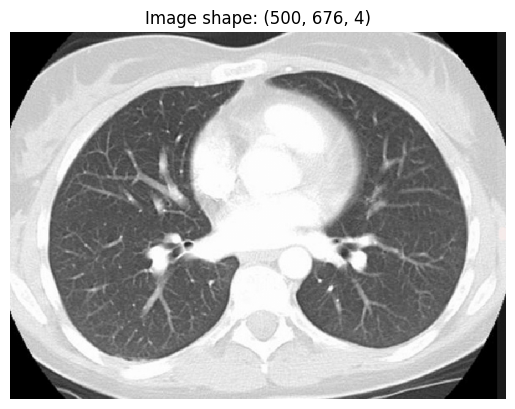

In [ ]:
def normalize(image):
    return (image - np.min(image))/(np.max(image) - np.min(image))
image=normalize(io.imread('CT_lungs.png'))
#image  = normalize(color.rgb2gray(io.imread('CT_lungs.png')))
x,y,channels=image.shape
print(channels)
plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image shape: " + str(image.shape))
plt.show()

In [ ]:
images = [color.rgb2gray(io.imread("CT_lungs.png")[:,:,:3])]
print(len(images))
size=len(images)
print(size)
for item in images:
  print(item)
a=np.array([1,2,3,4])
print(a[:3])
print(image.max())

1
1
[[0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 ...
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]]
[1 2 3]
1.0


In [ ]:
import scipy.signal as signal
from scipy import ndimage
def gaussian_smoothing(image, sigma):
  filter_size = np.floor(2.54 *sigma)
  if(filter_size%2==0):
    filter_size=int(filter_size+1)
  else:
    filter_size=int(filter_size)
  print(filter_size)
  gaussian_filter = np.zeros(((filter_size, filter_size,filter_size)))
  m = filter_size//2
  n = filter_size//2
  v=filter_size//2
  for x in range(-m, m+1):
    for y in range(-n, n+1):
      for z in range(-v,v+1):
        x1 = np.sqrt((2*np.pi)**3)*(sigma**3)
        x2 = np.exp(-(x**2 + y**2+z**2)/(2* sigma**2))

        gaussian_filter[x+m, y+n, z+v] = (1/x1)*x2

  im_filtered = np.zeros_like(image, dtype=np.float32)
  im_filtered = ndimage.convolve(image, gaussian_filter)
  return im_filtered

In [ ]:
import scipy.signal as signal
from scipy import ndimage
def gaussian_smoothing1(image, sigma):
  filter_size = 2 * int(4 * sigma + 0.5) + 1
  gaussian_filter = np.zeros((filter_size, filter_size,filter_size), np.float32)
  m = filter_size//2
  n = filter_size//2
  v=filter_size//2
  for k in range(channels-3):
    for x in range(-m, m+1):
      for y in range(-n, n+1):
        x1 = 2*np.pi*(sigma**2)
        x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
        gaussian_filter[x+m, y+n] = (1/x1)*x2
  im_filtered = np.zeros_like(image, dtype=np.float32)
  im_filtered = ndimage.convolve(image, gaussian_filter)
  return im_filtered

In [ ]:
from scipy import signal as scs
from scipy import ndimage
def gaussian_smoothing2(image, sigma):
  filter_size = np.ceil(sigma*2.54) // 2 * 2 + 1

  if(filter_size%2==0):
    filter_size=int(filter_size+1)
  else:
    filter_size=int(filter_size)
  print(filter_size)
  gaussian_filter = np.zeros((filter_size*2, filter_size*2), np.float32)
  m = filter_size
  n = filter_size
  for i in range(-m,m+1):
    for j in range(-n,n+1):
      x1 = 2.0*np.pi*(sigma**2)
      x2 = np.exp(-(i**2 + j**2)/(2.0* sigma**2))
      gaussian_filter[i+m-1,j+n-1]=(1/x1)*(x2)
  print("Smoothing mine:",np.size(gaussian_filter))
  return scs.convolve2d(image,gaussian_filter)

In [ ]:
def gaussian_smoothing3(image, sigma):
    size = np.ceil(sigma*2.54) // 2 * 2 + 1
    range = np.arange(-size,size+1)
    x,y = np.meshgrid(range,range)
    normal = 1 / (2.0 * np.pi * sigma**2)
    g_kernel =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    print("Smoothing Wiki:",np.size(g_kernel))
    return scs.convolve2d(image,g_kernel)

9
Smoothing mine: 324
Smoothing Wiki: 361


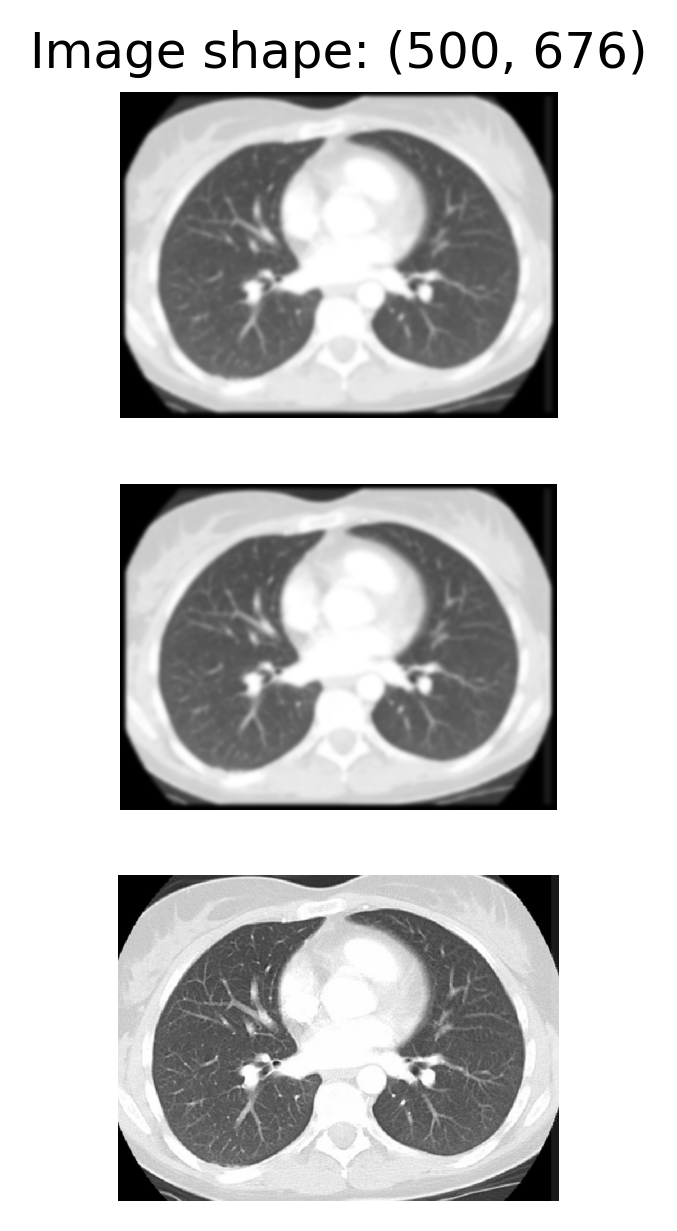

In [ ]:
for image in images:
  x1=gaussian_smoothing2(image,3)
  z1=gaussian_smoothing3(image,3)
  y1=[x1[:,:]]
  plt.figure(dpi=300)
  plt.subplot(3,1,1)
  plt.imshow(x1,cmap='gray')
  plt.axis('off')
  plt.title("Image shape: " + str(image.shape))
  plt.subplot(3,1,2)
  plt.imshow(z1,cmap='gray')
  plt.axis('off')
  plt.subplot(3,1,3)
  plt.imshow(image,cmap='gray')
  plt.axis('off')
  plt.show()

In [ ]:
import scipy.signal as signal
from scipy import ndimage
def gaussian_smoothing2(image, sigma):
  filter_size = 2 * int(4 * sigma + 0.5) + 1
  gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
  m = filter_size//2
  n = filter_size//2
  v=filter_size//2
  for k in range(channels):
    for x in range(-m, m+1):
      for y in range(-n, n+1):
        x1 = 2*np.pi*(sigma**2)
        x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
        gaussian_filter[x+m, y+n] = (1/x1)*x2
  im_filtered = np.zeros_like(image, dtype=np.float32)
  im_filtered = signal.convolve2d(image[:][:][0], gaussian_filter)
  return im_filtered

In [ ]:
y=gaussian_smoothing2(image,3)
plt.figure()
plt.imshow(y)
plt.axis('off')
plt.show()

ValueError: ignored

Finalnie korzystając z powyższych funkcji zaimplementuj funkcję canny:

In [ ]:
def calculate_gradients(image):
    """
    TO DO - Funkcja powinna zwrócić magnitude i kąt gradientu
    0.5p
    """

    # TO DO
    window_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ])

    window_y = window_x.T

    gradient_x = signal.correlate2d(image, window_x)
    gradient_y = signal.correlate2d(image, window_y)

    gradient_magnitude = np.zeros(image.shape)
    mag = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_angle = np.zeros(image.shape)
    ang = np.arctan2(gradient_y,gradient_x)
    gradient_magnitude=mag
    gradient_angle=ang

    return gradient_magnitude, gradient_angle

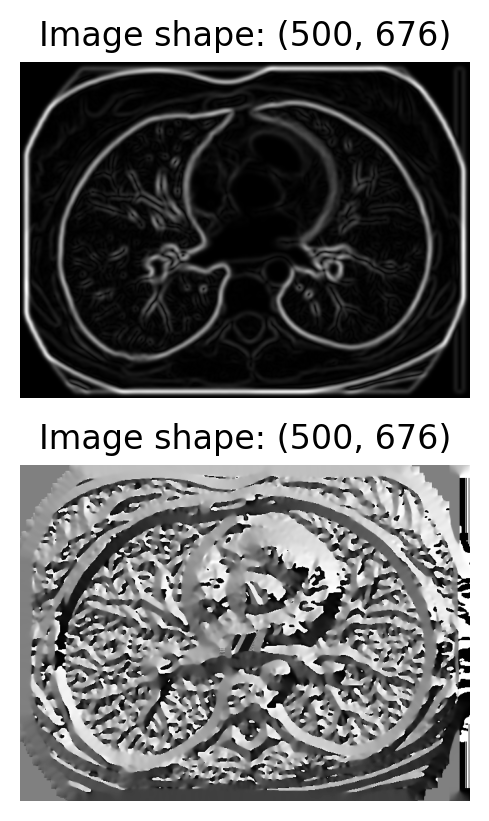

In [ ]:
import scipy.signal as signal
from scipy import ndimage
for image in images:
  x,y=calculate_gradients(z1)
  plt.figure(dpi=200)
  plt.subplot(2,1,1)
  plt.imshow(x,cmap='gray')
  plt.axis('off')
  plt.title("Image shape: " + str(image.shape))
  plt.subplot(2,1,2)
  plt.imshow(y,cmap='gray')
  plt.axis('off')
  plt.title("Image shape: " + str(image.shape))
  plt.show()

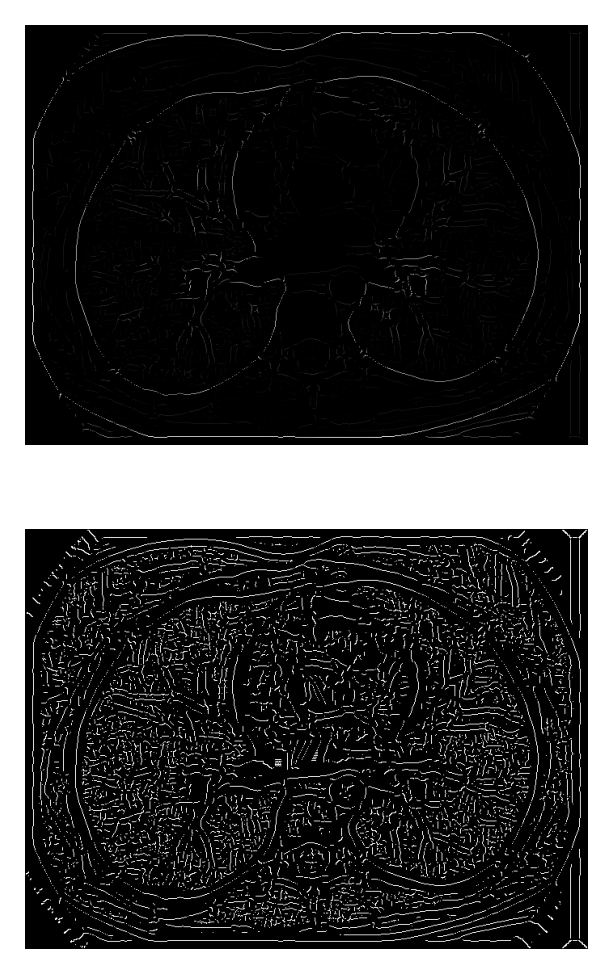

(520, 696)


In [ ]:
#na kolosssss



import matplotlib as mpl
def non_maximum_supression(gradient_magnitude, gradient_angle):
    """
    TO DO - funkcja powinna wyznaczyć potencjalnie krawędzie korzystając z magntiudy i kąta gradientu
    0.5p
    """
    y_size,x_size = gradient_magnitude.shape
    potential_edges = np.zeros(gradient_magnitude.shape)
    angle = gradient_angle * 180 / np.pi
    angle[angle < 0] += 180

    for i in range(1,y_size-1):
        for j in range(1,x_size-1):
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    px0 = gradient_magnitude[i, j+1]
                    px1 = gradient_magnitude[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    px0 = gradient_magnitude[i+1, j-1]
                    px1 = gradient_magnitude[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    px0 = gradient_magnitude[i+1, j]
                    px1 = gradient_magnitude[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    px0 = gradient_magnitude[i-1, j-1]
                    px1 = gradient_magnitude[i+1, j+1]

                if (gradient_magnitude[i,j] >= px0) and (gradient_magnitude[i,j] >= px1):
                    potential_edges[i,j] = gradient_magnitude[i,j]
                else:
                    potential_edges[i,j] = 0
    return potential_edges
u=non_maximum_supression(x,y)
v1=non_maximum_supression(x,y)
x_size,y_size=u.shape
for i in range(x_size):
  for j in range(y_size):
    if v1[i,j]!=0:
      v1[i,j]=1
plt.figure(dpi=250)
plt.subplot(2,1,1)
plt.imshow(u,vmin=0,vmax=1,cmap='gray')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(v1,vmin=0,vmax=1,cmap='gray')
plt.axis('off')
plt.show()
print(u.shape)

In [ ]:
def otsu_threshold(image):
    """
    TO DO - automatycznie wyznacz próg górny implementująć algorytm Otsu
    0.5p
    """
    threshold = 0
    return threshold

def double_threshold(potential_edges, gradient_magnitude):
    """
    TO DO  - podwójne progowanie wyznaczające krawędzie słabe poraz krawędzie mocne. Wyznacz próg górny korzystajac z otsu_threshold, a próg dolny poprzez podzielenie progu górnego przez 3
    0.5p
    """
    strong_edges = np.zeros(gradient_magnitude.shape)
    weak_edges = np.zeros(gradient_magnitude.shape)
    return strong_edges, weak_edges

69
0.27058823529411763
0.09019607843137255
1.01567193390968


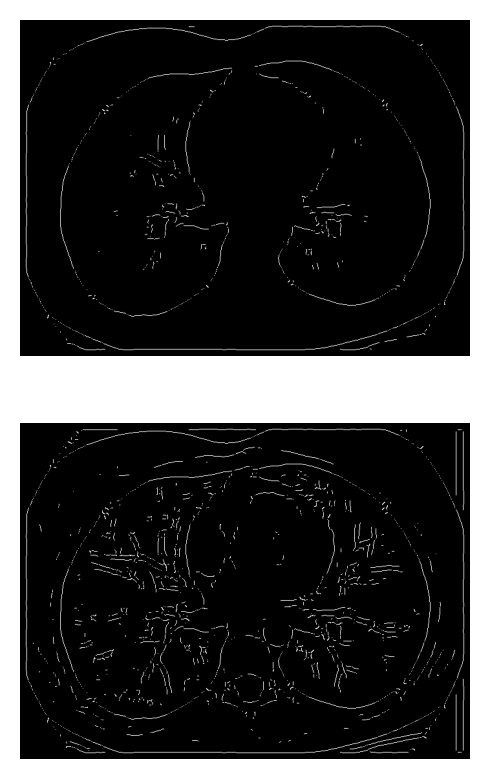

In [ ]:
def otsu_threshold(image):
    """
    TO DO - automatycznie wyznacz próg górny implementująć algorytm Otsu
    0.5p
    """
    top = 256
    wB, wF = 0, 0
    var_max = 0
    threshold = 0

    hist, bins = np.histogram(image,bins=256)
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]

    for t in range(1,top):
      wB = np.sum(hist[:t]) / np.sum(hist)
      wF = np.sum(hist[t:]) / np.sum(hist)
      miB = np.sum(np.arange(t)*hist[:t]) / wB
      miF = np.sum(np.arange(t,256)*hist[t:]) / wF
      var = wB * wF * (miB - miF)**2

      if var > var_max:
        threshold = t
        var_max = var
    print(threshold)
    return threshold/255

def double_threshold(potential_edges, gradient_magnitude):
    """
    TO DO  - podwójne progowanie wyznaczające krawędzie słabe poraz krawędzie mocne. Wyznacz próg górny korzystajac z otsu_threshold, a próg dolny poprzez podzielenie progu górnego przez 3
    0.5p
    """
    upper_th = otsu_threshold(gradient_magnitude)
    print(upper_th)
    lower_th = upper_th / 3
    print(lower_th)

    strong_edges = np.zeros_like(potential_edges)
    weak_edges = np.zeros_like(potential_edges)

    strong_edges[potential_edges > upper_th] = 1
    weak_edges[potential_edges > lower_th] = 1


    return strong_edges, weak_edges
e,r=double_threshold(u,x)
print(u.max())
plt.figure(dpi=200)
plt.subplot(2,1,1)
plt.imshow(e,cmap='gray')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(r,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def edge_hysteresis(strong_edges, weak_edges):
    """
    TO DO - dokonaj histerezy krawędzi silnych i słabych. Powinny pozostać tylko krawędzie silne oraz te krawędzie słabe, które są połączone z jakąkolwiek krawędzią silną (również przez krawędź słabą)
    0.5p
    Wskazówka: Funkcja będzie niemal identyczna z algorytmem rozrostu obszarów w wersji lokalnej z poprzedniego laboratorium
    """
    edges = np.copy(strong_edges)
    y_size, x_size = strong_edges.shape

    for i in range(1, y_size-1):
      for j in range(1, x_size-1):
          if (weak_edges[i,j] == 1):
                    if ((strong_edges[i+1, j-1] == 1) or (strong_edges[i+1, j] == 1) or (strong_edges[i+1, j+1] == 1)
                        or (strong_edges[i, j-1] == 1) or (strong_edges[i, j+1] == 1)
                        or (strong_edges[i-1, j-1] == 1) or (strong_edges[i-1, j] == 1) or (strong_edges[i-1, j+1] == 1)):
                        edges[i, j] = 1
                        strong_edges[i,j]=1

                    else:
                        edges[i, j] = 0
    return edges

In [ ]:
for i in range(1, y_size-1):
      for j in range(1, x_size-1):
          if (weak_edges[i,j] == 1):
                    if ((edges[i+1, j-1] == 1) or (edges[i+1, j] == 1) or (edges[i+1, j+1] == 1)
                        or (edges[i, j-1] == 1) or (edges[i, j+1] == 1)
                        or (edges[i-1, j-1] == 1) or (edges[i-1, j] == 1) or (edges[i-1, j+1] == 1)):
                        edges[i, j] = 1
                    else:
                        edges[i, j] = 0

NameError: ignored

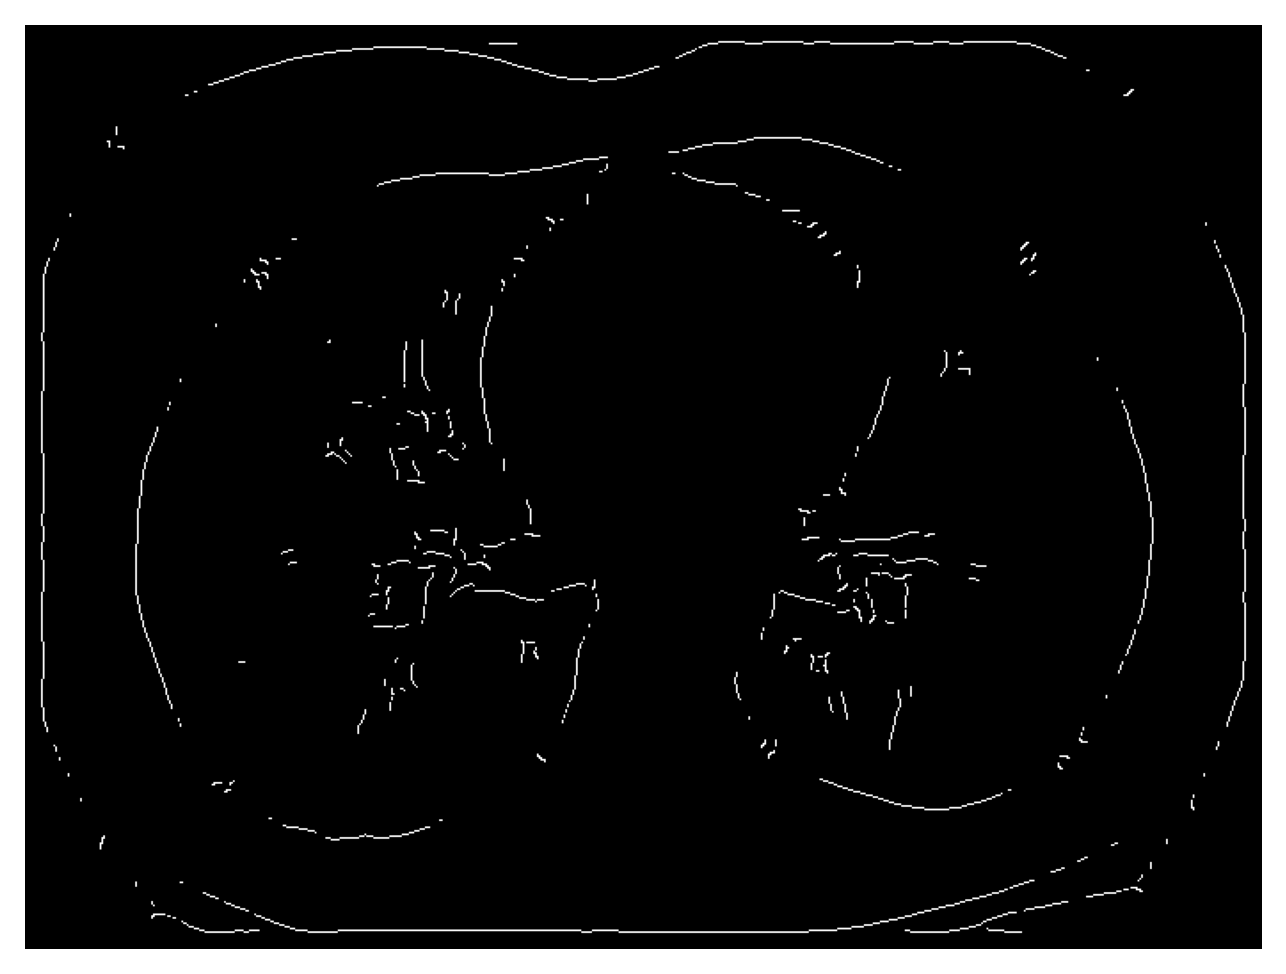

In [ ]:
lt=edge_hysteresis(e,r)
plt.figure(dpi=250)
plt.imshow(lt,cmap='gray')
plt.axis('off')
plt.show()

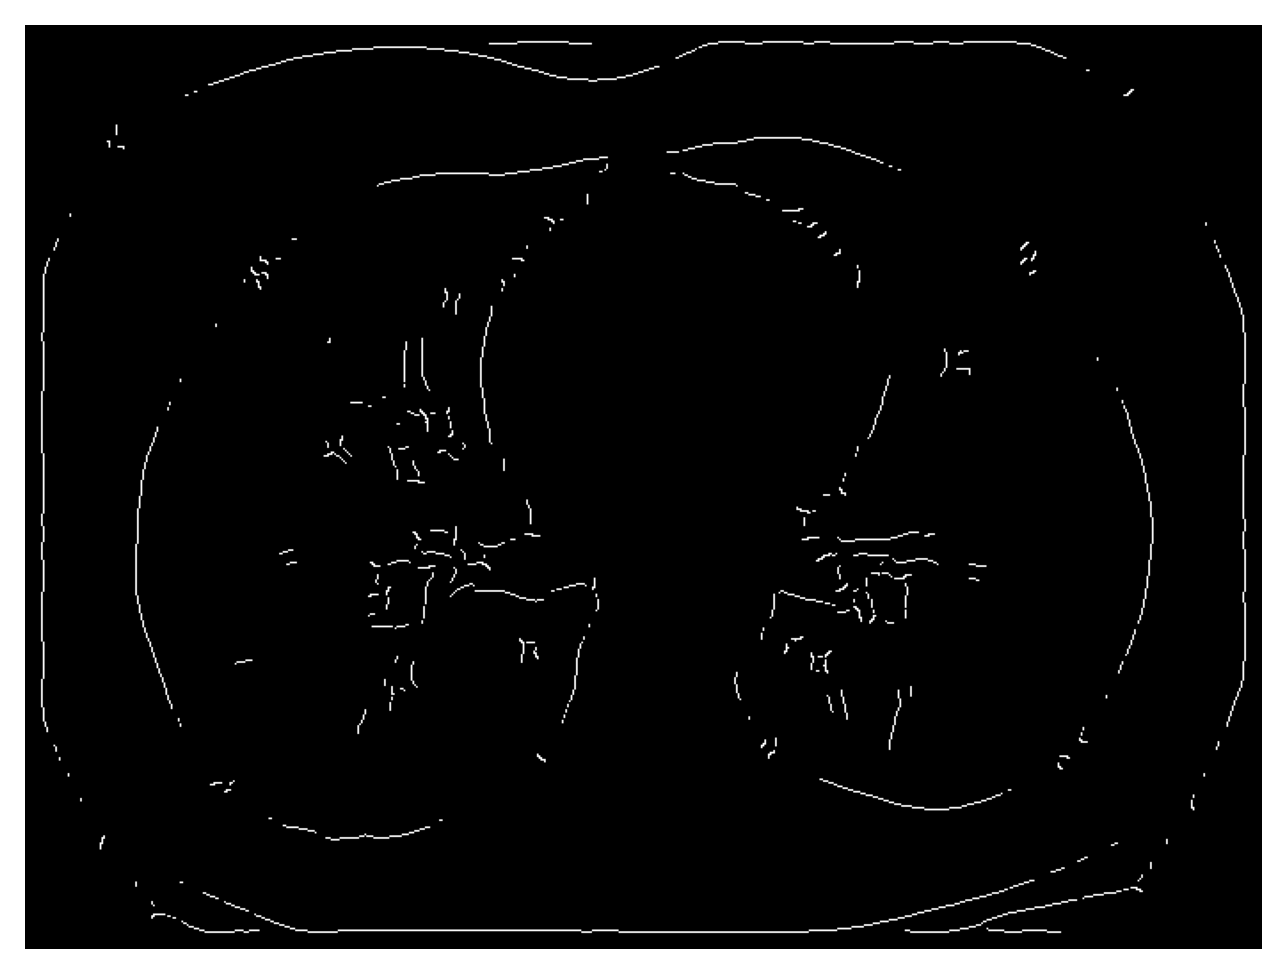

In [ ]:
lt=edge_hysteresis(e,r)
plt.figure(dpi=250)
plt.imshow(lt,cmap='gray')
plt.axis('off')
plt.show()

Finalnie korzystając z powyższych funkcji zaimplementuj funkcję canny:

Porównaj działanie zaimplementowanej funkcji na wygenerowanym oraz wczytanym obrazie:

In [ ]:
images = [image, color.rgb2gray(io.imread("CT_Lungs.png"))]
# Krawędzie mają grubość jednego pixela, nie wszystkie muszą być widoczne (ustawienia wyświetlania). Aby zobaczyć wszystkie krawędzie zwiększ dpi rysunku.
for current_image in images:
    skimage_canny = feature.canny(current_image, sigma=3)
    own_canny = canny(current_image, sigma=3)
    plt.figure(dpi=200)
    plt.subplot(1, 3, 1)
    plt.imshow(current_image, cmap='gray')
    plt.title("Image")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(skimage_canny, cmap='gray')
    plt.title("Canny skimage")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(own_canny, cmap='gray')
    plt.title("Canny own")
    plt.axis('off')
    plt.show()

FileNotFoundError: ignored

Wyniki poszczególnych etapów zostały zaprezentowane poniżej:

Filtracja Gauss (sigma=3):
Magnituda/kąt gradientu:
Non-maximum supression:
Podwójne progowanie:
Histereza krawędzi:

**Laboratorium 5 - Wprowadzenie do uczenia głębokiego, klasyfikacja**


Laboratorium można podzielić na następujące części:

    Wczytanie i wizualizaja zbioru treningowego i testowego
    Implementacja prostej sieci konwolucyjnej
    Trening sieci konwolucyjnej
    Analiza uzyskanych wyników na zbiorze testowym

In [ ]:
! unzip /content/Dataset.zip -d /content/Dataset
! pip install SimpleITK

Archive:  /content/Dataset.zip
  inflating: /content/Dataset/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(19).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(2).jpg  
  inflating: /content/Dataset/Testing/glioma_tumor/image(20).jpg  
  inflating: /content/Dataset/Te

In [ ]:
import numpy as np
from skimage import io
import torch as tc
import matplotlib.pyplot as plt

image = io.imread('/content/Dataset/Training/glioma_tumor/gg (1).jpg')
image.shape
image=tc.from_numpy(image).permute(2,0,1)
print(image.shape)

torch.Size([3, 512, 512])


Część I - Wczytanie i wizualizacja zbioru danych

In [ ]:
import os
import numpy as np
import torch as tc
import torchvision as tv
import matplotlib.pyplot as plt
import SimpleITK as sitk
from PIL import Image
from numpy import asarray
from skimage import color

path_to_dataset = r'/content'# Path to the downloaded and unzipped dataset

class OurDataset(tc.utils.data.Dataset):
    def __init__(self, dataset_path : str, mode : str="training"):
        self.dataset_path = dataset_path
        self.mode = mode # "training" or "testing"

        if self.mode == "training":
            self.data_path = os.path.join(self.dataset_path, "Training")
        elif self.mode == "testing":
            self.data_path = os.path.join(self.dataset_path, "Testing")
        else:
            raise ValueError("Unsupported mode.")

        self.classes = os.listdir(self.data_path) # Założenie, że klasy reprezentowane są przez nazwy folderów
        print(f"Available classes: {self.classes}")
        self.classes_dict = {self.classes[i]: i for i in range(len(self.classes))}
        print(f"Classes dict: {self.classes_dict}") # Mapowanie nazwy klasy do liczby

        # Utworzenie listy wszystkich przypadków treningowych (w praktyce robi się to w plikach zewnętrznych)
        # Utwórz listę zawierającą krotki, gdzie każda krotka zawiera parę (scieżka do zdjęcia, numeryczna reprezentacja klasy zdjęcia)
        self.cases = []
        for current_class in self.classes:
            for current_case in os.listdir(os.path.join(self.data_path, current_class)):
                case_path = os.path.join(self.data_path, current_class, current_case)
                curr_tuple = (case_path, current_class)
                # TODO - utworz odpowiednie krotki i dodaj je do listy self.cases
                self.cases += [(case_path,self.classes_dict[current_class])]
                #self.cases.append((case_path, ...))


    def __len__(self):
        # Przeciążanie funkcji niezbędnej do określenia wielkości zbioru danych
        return len(self.cases) #TODO - wyznacz wielkosc aktualnie wczytywanego zbioru
    #w funkcji get_item jest cos nie tak
    def __getitem__(self, idx):
        current_case = self.cases[idx]
        current_path = current_case[0]
        current_class = current_case[1]
        current_image = sitk.GetArrayFromImage(sitk.ReadImage(current_path))

        # Poszczególne zdjęcia mogą mieć inną rozdzielczość - dla uproszczenia dokonajmy resamplingu do tej samej rozdzielczości (224x224), następnie konwersji do skali szarości i normalizacji
        current_image = Image.fromarray(current_image)
        current_image = tv.transforms.functional.resize(current_image,(224,224))
        current_image = tv.transforms.functional.to_grayscale(current_image)
        current_image = tv.transforms.functional.to_tensor(current_image)

      #  current_image = Image.fromarray(current_image)
       # current_image=tv.transforms.functional.to_grayscale(current_image,3)
        #current_image=asarray(current_image).astype(np.float32)
        #current_image=tc.from_numpy(current_image)
        #current_image=current_image.permute(2,0,1)
        #TODO - konwersja do NumPy i zmiana kolejnosci wymiarow
        #current_image = tv.transforms.functional.resize(current_image,(224,224))
        #print(current_image.shape) #TODO - resampling do 224x224

        #current_image = tv.transforms.functional.to_grayscale(current_image,3).astype(np.float32) #TODO - konwersja do skali szarosci i typu float32

       # current_image[0,:,:]=(current_image[0,:,:] - tc.min(current_image[0,:,:]))/(tc.max(current_image[0,:,:]) - tc.min(current_image[0,:,:]))
        #current_image[1,:,:]=(current_image[1,:,:] - tc.min(current_image[1,:,:]))/(tc.max(current_image[1,:,:]) - tc.min(current_image[1,:,:]))
        #current_image[2,:,:]=(current_image[2,:,:] - tc.min(current_image[2,:,:]))/(tc.max(current_image[2,:,:]) - tc.min(current_image[2,:,:])) #TODO - normalizacja do zakresu [0-1]

        return current_image, current_class


training_dataset = OurDataset(path_to_dataset, "training") # Utworzenie zbioru treningowego
testing_dataset = OurDataset(path_to_dataset, "testing") # Utworzenie zbioru testowego
batch_size = 16     # Okreslenie ile przypadkow ma byc naraz wczytywane i procesowane -> istotny hyperparameter w trakcie treningu
shuffle = True # Czy przypadki w każdej epocje mają być wczytywane losowo. Epoka - każdorazowe przeiterowanie przez cały zbiór treningowy
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)
testing_dataloader = tc.utils.data.DataLoader(testing_dataset, batch_size=1, shuffle=False)


FileNotFoundError: ignored



Następnie sprawdź działanie zaimplementowanej funkcji iterując po zaimplementowanym dataloaderze, pokazując wczytywane przypadki.


In [ ]:
plt.figure(figsize=(13,13))
for images, classes in training_dataloader: # w tym miejscu pojawia sie błąd
    # Zalozenie batch_size = 16
    n_rows, n_cols = 4,4
    for i in range(n_rows*n_cols):
      plt.subplot(4,4,i+1)
      plt.imshow(images[i][0,...], cmap='gray')
      plt.title(classes[i].item(), fontsize=30)
      plt.axis('off')
    break
   # for i in range(batch_size):
    #  plt.figure(dpi=120)  zle!
     # plt.imshow(images[i].permute(1,2,0))
      #plt.axis('off') # TODO -Dokonaj wizualizacji przypominającą pokazaną poniżej (liczby oznaczają klasę zdefiniowaną wcześniej w słowniku w datasecie)

NameError: ignored

<Figure size 1300x1300 with 0 Axes>

Część II - Implementacja prostej sieci konwolucyjnej

In [ ]:
class SimpleNetwork(tc.nn.Module):
    def __init__(self):
        super(SimpleNetwork, self).__init__()

        self.layer_1 = tc.nn.Sequential(
            tc.nn.Conv2d(1, 32, 3, stride=1, padding=1),
            tc.nn.BatchNorm2d(32),
            tc.nn.ReLU()
        ) # Przyklad pierwszej warstwy (1-3)
        self.layer_2 = tc.nn.Sequential(
            tc.nn.Conv2d(32, 32, 3, stride=2, padding=1),
            tc.nn.BatchNorm2d(32),
            tc.nn.ReLU()
        )
        self.layer_3 = tc.nn.Sequential(
            tc.nn.Conv2d(32, 64, 3, stride=1, padding=1),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU()
        )
        self.layer_4 = tc.nn.Sequential(
            tc.nn.Conv2d(64, 64, 3, stride=2, padding=1),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU()
            )
        self.layer_5 = tc.nn.Sequential(
            tc.nn.Conv2d(64, 128, 3, stride=1, padding=1),
            tc.nn.BatchNorm2d(128),
            tc.nn.ReLU()
        )
        self.layer_6 = tc.nn.Sequential(
            tc.nn.Conv2d(128, 128, 3, stride=2, padding=1),
            tc.nn.BatchNorm2d(128),
            tc.nn.ReLU()
        )
        self.layer_7 =tc.nn.Sequential(
            tc.nn.Conv2d(128, 256, 3, stride=1, padding=1),
            tc.nn.BatchNorm2d(256),
            tc.nn.ReLU()
        )
        self.avg_pool = tc.nn.AvgPool2d(1, stride=1)
        self.last_layer = tc.nn.Sequential(
            tc.nn.Linear(256*28*28, 4)
        )

    def forward(self, x):
        x = self.layer_1(x) # Przyklad uzycia pierwszej warstwy
        x = self.layer_2(x)
        x = self.layer_3(x)
        x = self.layer_4(x)
        x = self.layer_5(x)
        x = self.layer_6(x)
        x = self.layer_7(x)
        x=self.avg_pool(x)
        x=x.view(-1, 256*28*28)
        x=self.last_layer(x) # TODO
        return x



W kolejnym kroku spróbujmy przez sieć przepuścić przykładowe obrazy i zaobserwujmy wyniki

In [ ]:
model = SimpleNetwork()
for images, classes in training_dataloader:
    output = model(images) # <- Kluczowa linijka kodu, wywołanie funkcji **forward** z klasy SimpleNetwork
    print(f"Output: {tc.nn.Sigmoid()(output)}") # <- w praktyce Sigmoid w celu wyznaczania prawdopodobieństwa umieszcza się poza siecią neuronową
    break

NameError: ignored

Wyniki są zgodne z oczekiwaniami - sieć zwraca de facto losowe wartości i nie potrafi podjąć żadnej decyzji. Nie została jeszcze nauczona by wykrywać i rozpoznawać poszczególne wzorce.

**Część III - Trening sieci konwolucyjne**







W kolejnym kroku dokonamy treningu zaimplementowanej sieci neuronowej. Będziemy ją trenować w sposób nadzorowany, tj. niejako pokazując sieci zadany przypadek i przyporządkowaną do niego klase. Tzw. supervised learning jest najpopularniejszym i najłatwiejszym sposobem trenowania sieci neuronowych jednak obarczony jest fundamentalną wadą - wymaga anotacji zbioru treningowego co w przypadku danych medycznych jest niezwykle kosztowne.


Na początku zdefiniujmy optymalizator i parametry treningu:

In [ ]:
learning_rate = 0.003 # Współczynnik uczenia, definiuje szybkość treningu, zbyt duży prowadzi do niestabilności, zbyt niski do wolnego uczenia
batch_size = 32 # Liczba obrazów analizowanych w zadanym momencie - większa wartość prowadzi do lepszego wykorzystania GPU, jednak może powodować większy potencjał do wpadania w minima lokalne
num_epochs = 100 # Liczba iteracji przez cały zbiór treningowy
objective_function = tc.nn.CrossEntropyLoss() # Funkcja kosztu, która będzie minimalizowana
model = SimpleNetwork()
parameters = model.parameters() # Parametry, które będą optymalizowane w trakcie treningu sieci
optimizer = tc.optim.Adam(parameters, lr=learning_rate) # Utworzenie obiektu optymalizatora -> w tym przypadku Adam (najpopularniejszy), w uproszczeniu - bardziej zaawansowany wariant spadku gradientowego
device = "cuda:0" # Urządzenie, na którym będzie prowadzony trening, użyjmy karty graficznej, ew. zmienić na "cpu" w przypadku jej braku. Karty graficzne są dostępnę na Google Colaboratory

training_dataset = OurDataset(path_to_dataset, "training")
shuffle = True
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

NameError: ignored

Następnie zaimplementujmy pętlę treningową:

In [ ]:
losses = []
model = model.to(device) # Transfer sieci do pamięci urządzenia (np. GPU)
model.train()
print(f"Dataset size: {len(training_dataloader.dataset)}")
for epoch in range(num_epochs):
    print(f"Current epoch: {epoch}")
    epoch_loss = 0.0
    for images, classes in training_dataloader:
        images, classes = images.to(device), classes.to(device) # Transfer obrazów do pamięci urządzenia (np. GPU)
        output = model(images) # Przejście obrazów przez model
        loss = objective_function(output, classes) # TODO - wyznacz aktualna funkcje kosztu
        loss.backward() # TODO - dokonaj backpropagacji gradientu wykorzystując wyznaczona wartosc kosztu
        optimizer.step() # TODO - dokonaj aktualizacji optymalizatora
        optimizer.zero_grad() # TODO - wyzeruj historie gradientu w optymalizatorze
        epoch_loss += loss.item() * images.size(0)
    epoch_loss = epoch_loss / len(training_dataloader.dataset)
    losses.append(epoch_loss)
    print(f"Current epoch loss: {epoch_loss}")

# Wizualizacja pętli treningowej
plt.figure()
plt.plot(losses, "r-")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


NameError: ignored

Część IV - Analiza wyników osobno na zbiorze treningowym i zbiorze testowym

Dokonaliśmy treningu sieci. W kolejnym kroku dokonajmy analizy wyników klasyfikacji odpowiednio na zbiorze treningowym oraz zbiorze testowym. Dokonajmy tego wykorzystując znaną z ADP metodę opartą na macierzy pomyłek (biblioteka sklearn), oraz wizualizując wyniki dla wybranych przypadków.

Dokonaj analizy ilościowej na zbiorze treningowym:

In [ ]:
import sklearn.metrics as metrics

predictions = []
targets = []
model.eval()
with tc.set_grad_enabled(False):
    print(f"Dataset size: {len(training_dataloader.dataset)}")
    for images, classes in training_dataloader:
        images, classes = images.to(device), classes.to(device)
        output = model(images)
        prediction = tc.argmax(tc.nn.Sigmoid()(output), dim=1)
        predictions.extend(prediction.cpu().numpy().tolist()) # TODO - dokonaj akumulacji predykcji
        targets.extend(classes.cpu().numpy().tolist()) # TODO - dokonaj akumulacji prawdziwych wartosci


# TODO - wyznacz macierz pomyłek oraz dokonaj jej wizualizacji (jak ponizej)

print("Training confusion matrix:")

c_mtr = metrics.confusion_matrix(targets,predictions)
print(c_mtr)

print("\nConfusion matrix")
res = metrics.ConfusionMatrixDisplay(c_mtr)
res.plot()
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

print("Training classification report: \n", metrics.classification_report(targets,predictions))

NameError: ignored



Które klasy są między sobą najczęściej mylone? Jak myślisz - dlaczego?


Dokonaj analizy ilościowej na zbiorze testowym:

In [ ]:
predictions = []
targets = []
model.eval()
with tc.set_grad_enabled(False):
    print(f"Dataset size: {len(testing_dataloader.dataset)}")
    for images, classes in testing_dataloader:
        images, classes = images.to(device), classes.to(device)
        output = model(images)
        prediction = tc.argmax(tc.nn.Sigmoid()(output), dim=1)
        predictions.extend(prediction.cpu().numpy().tolist()) # TODO - dokonaj akumulacji predykcji
        targets.extend(classes.cpu().numpy().tolist()) # TODO - dokonaj akumulacji prawdziwych wartosci


# TODO - wyznacz macierz pomyłek oraz dokonaj jej wizualizacji (jak ponizej)
print("Training confusion matrix:")

c_mtr = metrics.confusion_matrix(targets,predictions)
print(c_mtr)

print("\nConfusion matrix")
res = metrics.ConfusionMatrixDisplay(c_mtr)
res.plot()
plt.show()
plt.rcParams["figure.figsize"] = (9,9)

print("Training classification report: \n", metrics.classification_report(targets,predictions))

NameError: ignored

Dokonaj analizy wizualnej na zbiorze testowym. Pokaż tylko te przypadki, które zostały błędnie zaklasyfikowane podając obok zdjęcia wyznaczoną oraz rzeczywistą klasę.

In [ ]:
incorrect_tuples = []
max_size = 16
for images, classes in testing_dataloader:
    images, classes = images.to(device), classes.to(device)
    output = model(images) # Przejście obrazów przez model
    # TODO - dokonaj akumulacji pierwszych 16 przypadków gdzie wyznaczona klasa rozni sie od rzeczyistej i dodaj je do listy incorrect_tupples w fomracie (zdjecie w formacie numpy, predykcja, ground-truth)
    predicted = tc.argmax(tc.nn.Sigmoid()(output), dim=1)
    if classes != predicted:
      incorrect_tuples+=[(images.cpu().numpy(),predicted.cpu().numpy(),classes.cpu().numpy())]
      if len(incorrect_tuples) == 16:
        break
rows = 4
cols = 4
plt.figure(dpi=250)
for i in range(len(incorrect_tuples)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(incorrect_tuples[i][0][0][0], cmap='gray')
    to_print = f"Pre: {incorrect_tuples[i][1]}, Trg: {incorrect_tuples[i][2]}"
    plt.title(to_print)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
 import torch as tc
 m = tc.nn.Conv2d(1, 3, 3)
 input = tc.randn(1,5,50)
 output = m(input)
 print(output)

In [ ]:
m = tc.nn.BatchNorm2d(100)
input = tc.randn(20, 100, 35, 45)
output=m(input)
print(output)



Z czego mogą wynikać różnice między zbiorem treningowym, a zbiorem testowym? Jak można je minimalizować? Czy potrafisz wyjaśnić dlaczego sieć neuronowa podjęła taką, a nie inną decyzje?

# Laboratorium 6 - Uczenie głębokie - segmentacja

W trakcie laboratorium zostanie przedstawiony problem segmentacji obrazów medycznych na przykładzie segmentacji narzędzi w obrazach endoskopowych, wykorzystując algorytmy uczenia głębokiego.

Laboratorium można podzielić na następujące części:
- Utworzenie pliku .csv zawierającego scieżki do zdjęć i odpowiadających im masek binarnych, podział na zbiory
- Utworzenie datasetu i dataloaderów do wczytywania odpowiedniego zbioru treningowego, walidacyjnego i testowego
- Implementacja bazowej sieci U-Net
- Nadzorowany trening sieci U-Net
- Analiza uzyskanych rezultatów na poszczególnych zbiorach danych





### Część 1 - Utworzenie pliku .csv zawierającego informacje o zbiorze danych


napisać proste skrypty przekształcające strukture zadanego zbioru danych do pożądanej reprezetancji i przygotować jedynie jeden, dedykowany dataset/dataloader.

Problem będziemy rozwiązywać na przykładzie segmentacji narzędzi w obrazach endoskopowych. Zbiór danych pochodzi ponownie z platformy Kaggle: https://www.kaggle.com/datasets/debeshjha1/kvasirinstrument Obrazy endoskopowe zostały wybrane, ponieważ są to obrazy dwuwymiarowe, które w uproszczonej wersji problemu nie wymagają dużych mocy obliczeniowych. W praktyce obrazy endoskopowe są sekwencjami video, które muszą być przetwarzane w czasie rzeczywistym, co zdecydowanie komplikuje problem i nakłada dodatkowe ograniczenia.

Zbiór danych zawiera dwa foldery: images oraz masks, które zawierają odpowiednio zdjęcie endoskopowe oraz maske binarną wskazującą gdzie znajduje się narzędzie. Odpowiadające zdjęcia mają te same nazwy. W pierwszym kroku automatycznie stwórzmy i zapiszmy plik .csv zawierający pary: (scieżka do zdjęcia, ścieżka do maski binarnej).

In [ ]:
!unzip /Lab6_Dataset.zip

Archive:  /Lab6_Dataset.zip
  inflating: kvasir-instrument/bboxes.json  
  inflating: kvasir-instrument/images/images/ckcu8ty6z00003b5yzfaezbs5.jpg  
  inflating: kvasir-instrument/images/images/ckcu8v7pr00013b5ymfi2z7uf.jpg  
  inflating: kvasir-instrument/images/images/ckcu8w7vy00023b5y3vt2wczx.jpg  
  inflating: kvasir-instrument/images/images/ckcu8xad600033b5yc78xfyjx.jpg  
  inflating: kvasir-instrument/images/images/ckcu99qx200043b5yd2c5g84t.jpg  
  inflating: kvasir-instrument/images/images/ckcu9ejjf00053b5y4mf7bilw.jpg  
  inflating: kvasir-instrument/images/images/ckcu9ij2e00063b5yrrbb3f2o.jpg  
  inflating: kvasir-instrument/images/images/ckcu9j9vo00073b5y3m92mu6n.jpg  
  inflating: kvasir-instrument/images/images/ckcu9jucf00083b5ytpqoue72.jpg  
  inflating: kvasir-instrument/images/images/ckcu9ksoq00093b5ylw5wwfr2.jpg  
  inflating: kvasir-instrument/images/images/ckcu9lvft000a3b5yb79pnr64.jpg  
  inflating: kvasir-instrument/images/images/ckcu9mtrc000b3b5y826amhgq.jpg  
  i

In [ ]:
import pandas as pd
data_path = r'/content/kvasir-instrument' # TODO Sciezka do rozpakowanego zbioru danych
csv_path = os.path.join(data_path, "dataset.csv") # Sciezka do pliku .csv, ktory zostanie utworzony

images_path = os.path.join(data_path, "images")
masks_path = os.path.join(data_path, "masks")

images = os.listdir(images_path)
masks = os.listdir(masks_path)

dataset = []

for image in images:
    image_path = os.path.join(images_path, image) # TODO - zbuduj sciezke do zadanego zdjecia
    pre, ext = os.path.splitext(image)
    mask_path = os.path.join(masks_path, pre + '.png') # TODO - zbuduj sciezke do odpowiadajacej maski
    dataset.append([image_path, mask_path])

dataframe = pd.DataFrame(dataset, columns=["Image_Path", "Mask_Path"])
dataframe.to_csv(csv_path, index=False)

W drugim kroku dokonajmy podziału utworzonego pliku .csv na trzy oddzielnie pliki .csv, czyli na zbiór treningowy, walidacyjny, oraz testowy. Zbiór walidacyjny będzie używany w trakcie treningu do monitowania overfittingu, natomiast nie będzie wykorzystywany bezpośrednio do aktualizacji parametrów sieci. Dzięki temu można uzyskać na bieżąco informacje czy sieć nie zaczyna sie "przeuczać". Co prawda w folderze znajduje sie lista, które przypadki powinny być traktowane jako treningowe, a które jako testowe, zignorujmy to.



In [ ]:
input_csv_path = os.path.join(data_path, "dataset.csv")

training_csv_path =  os.path.join(data_path, "training_dataset.csv")# Sciezka do przypadkow treningowych
validation_csv_path = os.path.join(data_path, "validation_dataset.csv")# Sciezka do przypadkow walidacyjnych
testing_csv_path = os.path.join(data_path, "testing_dataset.csv") # Sciezka do przypadkow testowych

dataframe = pd.read_csv(input_csv_path)
split_ratio = (0.7, 0.1, 0.2) #70% - zbior treningowy, 10% - zbior walidacyjny, 20% - zbior testowy

# TODO - dokonaj podzialu na zbior treningowy/walidacyjny/testowy
training_dataframe = dataframe.iloc[:int(0.7 * len(dataframe))]
validation_dataframe = dataframe.iloc[:int(0.7 * len(dataframe)):int(0.8 * len(dataframe))]
testing_dataframe = dataframe.iloc[:int(0.8 * len(dataframe))]

print(f"Dataframe size: {len(dataframe)}")
print(f"Training Dataframe size: {len(training_dataframe)}")
print(f"Validation Dataframe size: {len(validation_dataframe)}")
print(f"Testing Dataframe size: {len(testing_dataframe)}")

training_dataframe.to_csv(training_csv_path, index=False)
validation_dataframe.to_csv(validation_csv_path, index=False)
testing_dataframe.to_csv(testing_csv_path, index=False)

ValueError: ignored

Część 2 - Utworzenie dedykowanego datasetu i dataloadera


Podobnie jak w przypadku klasyfikacji, utworzymy dedykowany dataset do wczytywania zbioru danych. Tym razem, dzięki temu, że dokonaliśmy wstępnego utworzenia pliku .csv, implementacja dataloadera będzie dużo łatwiejsza.
Podobnie jak w przypadku klasyfikacji, utworzymy dedykowany dataset do wczytywania zbioru danych. Tym razem, dzięki temu, że dokonaliśmy wstępnego utworzenia pliku .csv, implementacja dataloadera będzie dużo łatwiejsza

In [ ]:
import os
import numpy as np
import pandas as pd
import torch as tc
import torchvision as tv
import matplotlib.pyplot as plt
import SimpleITK as sitk

class EndoscopyDataset(tc.utils.data.Dataset):
    def __init__(self, data_path, csv_path):
        self.data_path = data_path # Sciezka zawierajaca zbior danych
        self.csv_path = csv_path # Sciezka do pliku csv zawierającego relatywne sciezki do poszczegolnych plikow
        self.dataframe = pd.read_csv(self.csv_path)

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        current_case = self.dataframe.iloc[idx]
        image_path = os.path.join(self.data_path, current_case["Image_Path"])
        mask_path = os.path.join(self.data_path, current_case["Mask_Path"])

        image = sitk.GetArrayFromImage(sitk.ReadImage(image_path)).astype(np.float32)
        mask = sitk.GetArrayFromImage(sitk.ReadImage(mask_path)).astype(np.float32) # Mimo tego, ze sa to maski binarne - na potrzeby treningu chcemy typ zmiennoprzecinkowy

        # image = tv.transforms.functional.to_tensor(image) #TODO - normalizacja do zakresu [0-1]
        # image = tv.transforms.functional.resize(image, (224, 224)) #TODO - resampling do 224x224

        # mask = tv.transforms.functional.to_tensor(mask) #TODO - normalizacja do zakresu [0-1]
        # mask = tv.transforms.functional.resize(mask, (224, 224)) #TODO - resampling do 224x224

        transforms = tv.transforms.Compose([
            tv.transforms.ToTensor(),
            tv.transforms.Resize((256, 256))
        ])

        image = transforms(image)
        mask = transforms(mask)
        mask = mask[0:1]
        # TODO - dokonaj konwersji na tensor, normalizacji obu tensorow do 0-1 oraz resamplingu do rozdzielczosci 256 x 256 (wyjsciowy wymiar zdjecia 3x256x256, a maski 1x256x256)
        return image, mask

Dokonaj wizualizacji kilku przypadków ze zbioru testowego:

In [ ]:
testing_dataset = EndoscopyDataset(data_path, testing_csv_path)
batch_size = 4
print(f"Dataset size: {len(testing_dataset)}")
testing_dataloader = tc.utils.data.DataLoader(testing_dataset, batch_size=batch_size, shuffle=False)

for images, masks in testing_dataloader:
    # Zakladamy batch_size = 4
    # Dokonaj wizualizacji widocznej ponizej
    for i in range(batch_size):
      plt.subplot(2, 4, i + 1)
      image = np.array(images[i].permute(1, 2, 0) / 255, dtype='float32')
      plt.imshow(image)

      plt.subplot(2, 4, i + 5)
      plt.imshow(masks[i].permute(1, 2, 0), cmap = 'gray')

    plt.tight_layout()
    plt.plot()
    break

SyntaxError: ignored

Część 3 - Implementacja architektury U-Net


Przed przystąpieniem do dalszych kroków należy zapoznać się z:

Warsty konwolucyjne: https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/

Normalizacja: https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

Funkcje aktywacji: https://www.section.io/engineering-education/activation-functions/

Przełomem w kontekście segmentacji obrazów medycznych, a później również algorytmów wizji komputerowej było zaproponowanie w 2015 na konferencji MICCAI architektury U-Net. Artykuł naukowy omawiający wspomnianą architekturę można znaleźć w: https://arxiv.org/pdf/1505.04597.pdf <- przed przystąpieniem do dalszej części zajęć należy go przeczytać.

Architektura U-Net jest przykładem architektury encodera-decodera, gdzie encoder ("lewa strona U") jest odpowiedzialny za stworzenie przestrzeni ukrytej zawierającej cechy umożliwiające wysegmentowanie zadanych struktur. Decoder ("prawa strona U") jest odpowiedzialny za przekształcenie reprezentacji w przestrzeni ukrytej (tzw. embedding / latent space) z powrotem do wymiarów zdjęcia pierwotnego, jednak tym razem reprezentując maskę binarną, a nie zdjęcie oryginalne.

Architektura U-Net zawiera trzy krytyczne struktury, które spowodowały jej sukces w kontekście segmentacji, a następnie również w wielu innych zastosowaniach (dopasowania, rekonstrukcji, detekcji..).

- Wykorzystanie warstw max-pool w kontekście zmniejszania rozdzielczości reprezentacji na kolejnych poziomach piramidy i tym samym zwiększenie tzw. receptive field. Czym jest i jak wyznaczyć receptive field: https://www.baeldung.com/cs/cnn-receptive-field-size. Wielkość receptive field jest kluczowa w trakcie projektowania dowolnych sieci neuronowych. Należy tak zaprojektować architekture aby sieć była w stanie ocenić kontekst globalny, tj. żeby parametry pochodzące z wszystkich miejsc w obrazie były wzajemnie połączone. Niestety, lokalna charakterystyka operacji konwolucji nie umożliwia pełnej realizacji tego założenia, w związku z czym powstały takie architektury jak np. Vision Transformer (który nie będzie omawiany na tym przedmiocie). Niemniej, sieci konwolucyjne są bardzo dobrym narzędziem do wielu zastosowań, szczególnie tych, dla których globalne zależności nie są kluczowe jak np. segmentacja narzędzi chirurgicznych.
- Wprowadzenie skip-connections między poszczególnymi poziomami architektury. Dzięki temu jest możliwe zdecydowane zwiększenie receptive field oraz ograniczenie problemu zanikającego gradientu. Bezpośrednie połączenie wyższych poziomów encodera z decoderem umożliwia połączenie i utrzymanie wzajemnej relacji między filtrami (cechami) w poszczególnych warstwach.
- Zastosowanie tzw. dekonwolucji (konwolucji transponowanej) w dekoderze. Dzięki temu możliwe jest nauczenie sieci filtrów zwiększających rozdzielczość poszczególnych reprezentacji i uzyskanie precyzyjnych masek binarnych na wyjściu. Można je potraktować jako nauczoną interpolacje nieliniową.

W kolejnym kroku, bazując na poprzednim laboratorium oraz wspomnianym artykule, dokonaj implementacji sieci U-Net, z jedną modyfikacją: spraw by rozdzielczość tensora wyjściowego była taka sama jak rozdzielczość tensora wejściowego (3x256x256 -> 1x256x256). Można tego dokonać stosując odpowiedni padding w poszczególnych warstwach konwolucyjnych/dekonwolucyjnych. Uwaga - podobnie jak w trakcie poprzedniego laboratorium, dodaj warstwy BatchNorm2D

Każdy blok enkodera i dekodera powinien składać się z dwukrotnie powtórzonej sekwencji:

- warstwy konwolucyjnej (tc.nn.Conv2d)
- warstwy normalizacji wsadowej (tc.nn.BatchNorm2d)
- warstwy aktywacji (tc.nn.ReLU)

Dodatkowo pomiędzy blokami enkodera pamiętaj downsamplingu (tc.nn.MaxPool2d), a pomiędzy blokami dekodera o upsamlingu (tc.nn.ConvTranspose2d)

In [ ]:
class UNet(tc.nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder_1 = tc.nn.Sequential(
            tc.nn.Conv2d(3,64,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU(),
            tc.nn.Conv2d(64,64,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU()
        )
        self.encoder_2 = tc.nn.Sequential(
            tc.nn.MaxPool2d(kernel_size=2,stride=2),
            tc.nn.Conv2d(64,128,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(128),
            tc.nn.ReLU(),
            tc.nn.Conv2d(128,128,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(128),
            tc.nn.ReLU()
        )
        self.encoder_3 = tc.nn.Sequential(
            tc.nn.MaxPool2d(kernel_size=2,stride=2),
            tc.nn.Conv2d(128,256,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(256),
            tc.nn.ReLU(),
            tc.nn.Conv2d(256,256,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(256),
            tc.nn.ReLU()
        )
        self.encoder_4 = tc.nn.Sequential(
            tc.nn.MaxPool2d(kernel_size=2,stride=2),
            tc.nn.Conv2d(256,512,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(512),
            tc.nn.ReLU(),
            tc.nn.Conv2d(512,512,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(512),
            tc.nn.ReLU()

        )
        self.encoder_5 = tc.nn.Sequential(
            tc.nn.MaxPool2d(kernel_size=2,stride=2),
            tc.nn.Conv2d(512,1024,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(1024),
            tc.nn.ReLU(),
            tc.nn.Conv2d(1024,1024,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(1024),
            tc.nn.ReLU(),
            tc.nn.ConvTranspose2d(1024,512,kernel_size=2,stride = 2)

        )
        self.decoder_4 = tc.nn.Sequential(
            tc.nn.Conv2d(1024,512,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(512),
            tc.nn.ReLU(),
            tc.nn.Conv2d(512,512,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(512),
            tc.nn.ReLU(),
            tc.nn.ConvTranspose2d(512,256,kernel_size=2,stride = 2)
        )
        self.decoder_3 = tc.nn.Sequential(
            tc.nn.Conv2d(512,256,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(256),
            tc.nn.ReLU(),
            tc.nn.Conv2d(256,256,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(256),
            tc.nn.ReLU(),
            tc.nn.ConvTranspose2d(256,128,kernel_size=2,stride = 2)
        )
        self.decoder_2 = tc.nn.Sequential(
            tc.nn.Conv2d(256,128,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(128),
            tc.nn.ReLU(),
            tc.nn.Conv2d(128,128,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(128),
            tc.nn.ReLU(),
            tc.nn.ConvTranspose2d(128,64,kernel_size=2,stride = 2)
        )
        self.decoder_1 = tc.nn.Sequential(
            tc.nn.Conv2d(128,64,3,stride=1,padding = 1),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU(),
            tc.nn.Conv2d(64,64,3,stride=1,padding=1),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU(),
            tc.nn.Conv2d(64,1,kernel_size=1)
        )

    def forward(self, x):
        x1 = self.encoder_1(x)
        x2 = self.encoder_2(x1)
        x3 = self.encoder_3(x2)
        x4 = self.encoder_4(x3)
        x5 = self.encoder_5(x4)
        d4 = self.decoder_4(tc.cat((x4, x5), dim=1))
        d3 = self.decoder_3(tc.cat((x3, d4), dim=1))
        d2 = self.decoder_2(tc.cat((x2, d3), dim=1))
        d1 = self.decoder_1(tc.cat((x1, d2), dim=1))
        return d1

Następnie spraw działanie sieci na losowych zdjęciach wejściowych:


In [ ]:
model = UNet()
for images, masks in testing_dataloader:
    outputs = model(images)

    for i in range(batch_size):
        plt.subplot(3,4,i+1)
        plt.imshow(images[i].permute(1,2,0))
        plt.subplot(3,4,i+5)
        plt.imshow(masks[i].permute(1,2,0),cmap = 'gray')
        plt.subplot(3,4,i+9)
        plt.imshow(outputs[i].detach().permute(1,2,0),cmap = 'gray')
    plt.tight_layout()
    plt.plot()

    break

Część 4 - Trening sieci segmentacyjnej

Problem segmentacji możemy potraktować jako klasyfikację poszczególnych pikseli/voxeli. W związku z tym możliwe jest wykorzystanie funkcji entropijnych do treningu algorytmów segmentacji. Alternatywnie, możliwe jest wprost wykorzystanie współczynnika Dice'a w wersji różniczkowalnej (patrz: ewaluacja projektu). W trakcie tego laboratorium wykorzystamy bezpośrednio tzw. Soft Dice Loss. Pozostałe elementy pętli treningowej są analogicznie jak na poprzednich zajęciach (uczenie nadzorowane), jedyne różnice to fakt występowania zbioru walidacyjnego oraz używanie obrazów binarnych jako ground-truth zamiast zakodowanej klasy.

W kolejnym kroku zaimplementuj pętle uczącą i dokonaj treningu zaimplementowanej sieci:

In [ ]:
# Ponizej analogicznie jak na poprzednich zajeciach
learning_rate = 0.003
model = UNet()
batch_size = 8
num_epochs = 60
parameters = model.parameters()
optimizer = tc.optim.Adam(parameters, lr=learning_rate)
device = "cuda:0"

def dice_loss(prediction, target):
    smooth = 1
    prediction = prediction.contiguous().view(-1)
    target = target.contiguous().view(-1)
    intersection = tc.sum(prediction * target)
    return 1 - ((2 * intersection + smooth) / (prediction.sum() + target.sum() + smooth))

objective_function = dice_loss

training_dataset = EndoscopyDataset(data_path, training_csv_path)
validation_dataset = EndoscopyDataset(data_path, validation_csv_path)
shuffle = True
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)
validation_dataloader = tc.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Ponizej analogicznie jak na poprzednich zajeciach
learning_rate = 0.003
model = UNet()
batch_size = 8
num_epochs = 60
parameters = model.parameters()
optimizer = tc.optim.Adam(parameters, lr=learning_rate)
device = "cuda:0"

def dice_loss(prediction, target):
    smooth = 1
    prediction = prediction.contiguous().view(-1)
    target = target.contiguous().view(-1)
    intersection = tc.sum(prediction * target)
    return 1 - ((2 * intersection + smooth) / (prediction.sum() + target.sum() + smooth))

objective_function = dice_loss

training_dataset = EndoscopyDataset(data_path, training_csv_path)
validation_dataset = EndoscopyDataset(data_path, validation_csv_path)
shuffle = True
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)
validation_dataloader = tc.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

Część 5 - Ilościowa i jakościowa analiza wyników

Działanie algorytmów segmentacji obrazów medycznych ocenianie jest najcześciej wykorzystując współczynnik Dice'a oraz odległość Hausdorffa. Pierwsza wielkość mówi o zgodności objętościowej, druga o zgodności krawędzi. Oba sposoby ewaluacji są komplementarne i powinny być wykorzystywane razem.

Poniżej znajdują sie implementacje współczynnika Dice'a oraz miary Hausdorffa:

In [ ]:
from scipy.ndimage import _ni_support
from scipy.ndimage.morphology import distance_transform_edt, binary_erosion, generate_binary_structure
from glob import glob


def dc(input1, input2):
    input1 = np.atleast_1d(input1)
    input2 = np.atleast_1d(input2)
    intersection = np.count_nonzero(input1 & input2)
    size_i1 = np.count_nonzero(input1)
    size_i2 = np.count_nonzero(input2)
    try:
        dc = 2. * intersection / float(size_i1 + size_i2)
    except ZeroDivisionError:
        dc = 0.0
    return dc

def __surface_distances(result, reference, voxelspacing=None, connectivity=1):
    result = np.atleast_1d(result)
    reference = np.atleast_1d(reference)
    if voxelspacing is not None:
        voxelspacing = _ni_support._normalize_sequence(voxelspacing, result.ndim)
        voxelspacing = np.asarray(voxelspacing, dtype=np.float64)
        if not voxelspacing.flags.contiguous:
            voxelspacing = voxelspacing.copy()
    footprint = generate_binary_structure(result.ndim, connectivity)
    if 0 == np.count_nonzero(result):
        raise RuntimeError('The first supplied array does not contain any binary object.')
    if 0 == np.count_nonzero(reference):
        raise RuntimeError('The second supplied array does not contain any binary object.')
    result_border = result ^ binary_erosion(result, structure=footprint, iterations=1)
    reference_border = reference ^ binary_erosion(reference, structure=footprint, iterations=1)
    dt = distance_transform_edt(~reference_border, sampling=voxelspacing)
    sds = dt[result_border]
    return sds

def hd95(result, reference, voxelspacing=None, connectivity=1):
    hd1 = __surface_distances(result, reference, voxelspacing, connectivity)
    hd2 = __surface_distances(reference, result, voxelspacing, connectivity)
    hd95 = np.percentile(np.hstack((hd1, hd2)), 95)
    return hd95


Wykorzystaj je aby dokonać ewaluacji odpowiednio zbioru treningowego, walidacyjnego oraz testowego.

In [ ]:
optimizer.zero_grad()
batch_size = 4
training_dataset = EndoscopyDataset(data_path, training_csv_path)
validation_dataset = EndoscopyDataset(data_path, validation_csv_path)
testing_dataset = EndoscopyDataset(data_path, testing_csv_path)

training_dices = []
validation_dices = []
testing_dices = []
training_hds95 = []
validation_hds95 = []
testing_hds95 = []

model.eval()
with tc.set_grad_enabled(False):
    for images, masks in training_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        # TODO - Wyznacz i dokonaj agregacji DSC, HD95 dla wszystkich przypadkow

    for images, masks in validation_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        # TODO - Wyznacz i dokonaj agregacji DSC, HD95 dla wszystkich przypadkow

    for images, masks in testing_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        # TODO - Wyznacz i dokonaj agregacji DSC, HD95 dla wszystkich przypadkow

print(f"Training Dice Mean: {np.array(training_dices).mean()}")
print(f"Training Dice Std: {np.array(training_dices).std()}")
print(f"Training Dice Min: {np.array(training_dices).min()}")
print(f"Training Dice Max: {np.array(training_dices).max()}")

print(f"Validation Dice Mean: {np.array(validation_dices).mean()}")
print(f"Validation Dice Std: {np.array(validation_dices).std()}")
print(f"Validation Dice Min: {np.array(validation_dices).min()}")
print(f"Validation Dice Max: {np.array(validation_dices).max()}")

print(f"Testing Dice Mean: {np.array(testing_dices).mean()}")
print(f"Testing Dice Std: {np.array(testing_dices).std()}")
print(f"Testing Dice Min: {np.array(testing_dices).min()}")
print(f"Testing Dice Max: {np.array(testing_dices).max()}")

print()

print(f"Training HD95 Mean: {np.array(training_hds95).mean()}")
print(f"Training HD95 Std: {np.array(training_hds95).std()}")
print(f"Training HD95 Min: {np.array(training_hds95).min()}")
print(f"Training HD95 Max: {np.array(training_hds95).max()}")

print(f"Validation HD95 Mean: {np.array(validation_hds95).mean()}")
print(f"Validation HD95 Std: {np.array(validation_hds95).std()}")
print(f"Validation HD95 Min: {np.array(validation_hds95).min()}")
print(f"Validation HD95 Max: {np.array(validation_hds95).max()}")

print(f"Testing HD95 Mean: {np.array(testing_hds95).mean()}")
print(f"Testing HD95 Std: {np.array(testing_hds95).std()}")
print(f"Testing HD95 Min: {np.array(testing_hds95).min()}")
print(f"Testing HD95 Max: {np.array(testing_hds95).max()}")


Dokonaj również wizualizacji jakościowej pokazanej niżej (pokazanie obok siebie przykładowych zdjęć, ground-truth oraz wyznaczonych masek segmentacyjnych).

In [ ]:
with tc.set_grad_enabled(False):
    for images, masks in training_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        for i in range(4):
            plt.subplot(3,4,i+1)
            plt.imshow(images[i].cpu().permute(1,2,0))
            plt.subplot(3,4,i+5)
            plt.imshow(masks[i].cpu().permute(1,2,0),cmap = 'gray')
            plt.subplot(3,4,i+9)
            plt.imshow(outputs[i].detach().cpu().permute(1,2,0),cmap = 'gray')
        plt.tight_layout()
        plt.plot()# TODO - dokonaj wizualizacji losowych przypadkow ze zbioru treningowego
        break

with tc.set_grad_enabled(False):
    for images, masks in testing_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        for i in range(4):
            plt.subplot(3,4,i+1)
            plt.imshow(images[i].cpu().permute(1,2,0))
            plt.subplot(3,4,i+5)
            plt.imshow(masks[i].cpu().permute(1,2,0),cmap = 'gray')
            plt.subplot(3,4,i+9)
            plt.imshow(outputs[i].detach().cpu().permute(1,2,0),cmap = 'gray')
        plt.tight_layout()
        plt.plot()# TODO - dokonaj wizualizacji losowych przypadkow ze zbioru testowego
        break

plt.show()

TEORIA

1. JAKIE ZNASZ OPERACJE NA OBRAZACH BINARNYCH?

Przekształcenia morfologiczne na obrazie:
- EROZJA- operacja usuwania pikseli z brzegów obiektu na obrazie, znikanie małych detali(np.szum), filtr minimalny, element który znajduje się w danym elemencie strukturalnym(danym oknie) przyjmuje wartość min i ta wartość przypisujemy do wartości centralnej
- DYLATACJA- operacja dodawania pikseli do krawędzi obiektu na obrazie, łatanie dziur, filtr maksymalny; dylatacja służy do zamykania małych otworów oraz zatok we wnętrzu figury. Obiekty zwiększają swoją objętość i jesli 2 lub więcej obiektów jest położonych blisko siebie, zrastają się w większe obiekty. Element ktory znajduje się w danym elemencie strukturalnym przyjmuje wartosc max i ta wartosc przypisujemy
- OTWARCIE- łagodzi ostre zakończenia obiektu, erozja potem dylatacja
- ZAMKNIĘCIE - wygładza wżerki w obiekcie, dylatacja potem erozja

Erozja i dylatacja modyfikują rozmiar obrazu; otwarcie i zamknięcie nie modyfikują obrazu, jedynie obiekty nieporządane

2. JAK WYZNACZYĆ KRAWĘDZIE OBRAZU BINARNEGO?

wyznaczanie krawędzi:
wykorzystując bramki logiczne oraz dylatację(do zew krawędzi) i erozję(do wew)

robimy logical and z dylatacji i logical not z circle(XD?)
robimy logical and z logical not erozji circle i circle

small circle = generate_circle(64,64,32,32,8)
outer_edge = np.logical_and(nd.binary_dilatation(small_circle, np.ones((3,3))), np.logical_not(small_circle))

inner_edge = np.logical_and(np.logical_not(nd.binary_erosion(small_circle, np.ones((3,3))), small_circle)

3. CZYM RÓŻNI SIĘ ROZROST LOKALNY OD GLOBALNEGO? KTÓRY JEST SZYBSZY I W JAKIM PRZYPADKU SZYBSZY BĘDZIE LOKALNY?

W wersji globalnej szukamy wszystkich pikseli, które spełniają warunek zmieszczenia się w przedziale(seed_intensity - bottom_threshold, seed_intensity + upper_threshold), a pozniej sprawdzamy które pixele sąsiadują z seedem

W wersji lokalnej sprawdzamy iteracyjnie, które piksele sąsiadujące z seedem spełniają ten warunek.

Róznią się czasem wykonania, czyli złożonością obliczeniową.

Globalny jest o wiele szybbszy od lokalnego

4. ALGORYTM ROZROSTU OBSZARÓW LOKALNY I GLOBALNY- JAK DZIAŁAJĄ, PO CO SIĘ UŻYWA, WADY I ZALETY, CZYM SIĘ RÓŻNIĄ I GDZIE LOKALNY MA ZASTOSOWANIE

Rozrost obszarów lokalny:

Jak działają:

Algorytm rozrostu obszarów lokalnych rozpoczyna się od wybranego punktu startowego (tzw. seed point) i stopniowo rozszerza obszar poprzez dodawanie sąsiadujących pikseli, które spełniają określone kryteria podobieństwa (np. wartość piksela, kolor, tekstura). Proces ten jest powtarzany dla każdego nowego piksela, aż do osiągnięcia zdefiniowanego warunku zatrzymania.

Po co się używa:

Algorytm rozrostu obszarów lokalnych jest często stosowany do segmentacji obrazu, wyodrębniania obiektów i analizy teksturowanych obszarów. Może być również stosowany w analizie danych do grupowania obserwacji na podstawie
podobieństwa.

Zalety:

Prosta implementacja, efektywny dla obrazów o jednorodnych obszarach, może być dostosowany do różnych kryteriów podobieństwa.

Wady:

Wrażliwość na hałas i niejednorodności w obrazie, może prowadzić do niepożądanej łączenia obszarów w przypadku występowania podobieństwa między niepowiązanymi fragmentami obrazu.

Rozrost obszarów globalny:

Jak działają:

Algorytm rozrostu obszarów globalnych różni się od lokalnego tym, że uwzględnia nie tylko sąsiedztwo bezpośrednie, ale także dalsze oddalone piksele. Może opierać się na różnych miarach podobieństwa, takich jak odległość euklidesowa, korelacja lub gradienty obrazu. Algorytm dąży do minimalizacji pewnego kryterium globalnego, takiego jak energii lub funkcji kosztu.

Po co się używa:

Algorytm rozrostu obszarów globalnych znajduje zastosowanie w segmentacji obrazu, kompresji danych, detekcji krawędzi, śledzeniu obiektów itp. Dzięki uwzględnieniu większego kontekstu obrazu może dostarczać dokładniejszych rezultatów w przypadku bardziej złożonych struktur.

Zalety:

Może uwzględniać globalne właściwości obrazu, bardziej odporny na hałas i
niejednorodności w obrazie, potencjalnie bardziej dokładne rezultaty.

Wady:

Złożoność obliczeniowa może być większa niż w przypadku rozrostu lokalnego, wprowadza większe wymagania dotyczące mocy obliczeniowej i pamięci.

Podsumowując, algorytmy rozrostu obszarów lokalnego i globalnego są używane do segmentacji obrazu, ale różnią się sposobem uwzględniania kontekstu i skali analizowanych obszarów. Rozrost lokalny jest bardziej odpowiedni do prostych struktur obrazu, podczas gdy rozrost globalny może dostarczyć dokładniejsze wyniki w przypadku bardziej złożonych struktur.







5. JAKIE ZNAMY ALGORYTMY SEGMENTACJI? CO TO JEST SEGMENTACJA?

Segmentacja to proces podziału obrazu na różne obszary lub segmenty, które reprezentują odrębne obiekty, struktury lub regiony o podobnych właściwościach.

Rodzaje/typy segmentacji:
- lokalna i globalna
- twarda i miękka(twarda-zwraca inf o przynależności piksela do konkretnego podzbioru, żaden piksel nie nalezy równocześnie do dwóch podzbiorów; miękka - określa prawdopodobieństwo przynależności do określonego podzbioru)
- multilabelowa/pojedynczolabelowa

Algorytmy
- progowanie (Thresholding): Jest to najprostszy i najczęściej stosowany algorytm segmentacji. Polega na przypisaniu pikselom wartości progowej, w oparciu o które dokonuje się podziału pikseli na różne segmenty. Próg może być ustalony ręcznie lub wyznaczany automatycznie na podstawie analizy histogramu obrazu.
- Algorytmy rozrostu obszarów (Region Growing): W oparciu o podobieństwo pikseli, te algorytmy rozpoczynają od punktów startowych (tzw. seed points) i stopniowo rozszerzają obszary poprzez agregację sąsiadujących pikseli, które spełniają określone kryteria podobieństwa.
- Metody oparte na konturach (Contour-based methods): Te metody wykorzystują informacje o krawędziach lub konturach obiektów do segmentacji. Algorytmy, takie jak algorytm Canny czy transformata Hougha, mogą być stosowane do wykrywania krawędzi lub linii na obrazie.


6. CO TO JEST SEGMENTACJA, JAK OBLICZAMY JEJ WYNIK, JAKIE SĄ METODY SEGMENTACJI?

jak obliczamy wynik:
- pixel accuracy - procent pikseli w obrazie, które zostaly sklasyfikowane poprawnie(najgorsza metoda, raczej nieużywana)
- Intersection over Union(IoU) - obszar nakładania się przewidywanej segmentacji i prawdziwej, podzielonej przez obszar unii pomiędzy przewidywaną segm. i prawdziwą. Metryka ta zawiera się w przedziale(0-1 - 0-100%), gdzie 0 ozn. brak nakładania się, a 1 oznacza idealnie nakładającą się segmentacje. W przypadku segm. binarnej(dwie klasy) lub wieloklasowej średni IoU obrazu jest obliczany poprzez wzięcie IoU z każdej klasy i uśrednienie ich
- dice coefficient(F1 score) -???????

7. CO ROBI FUNKCJA AKTYWACJI? JAKIE BYŁY NA ZAJĘCIACH?

Funkcja aktywacji to nieliniowa funkcja, która jest stosowana w neuronach sztucznych sieci neuronowych. Funkcje aktywacji wprowadzają nieliniowość do działania neuronów, co pozwala sieciom neuronowym modelować bardziej złożone zależności i wykonywać skomplikowane obliczenia.

Przykłady:
- funkcja sigmoidalna (Sigmoid): Jest to funkcja, która przekształca dowolną wartość wejściową na przedział (0, 1), co pozwala interpretować wyjście neuronu jako prawdopodobieństwo.
- Funkcja ReLU (Rectified Linear Unit): Jest to funkcja, która zwraca wartość wejściową, jeśli jest dodatnia, a w przeciwnym przypadku zwraca zero. ReLU jest popularna ze względu na prostotę obliczeniową i skuteczność w uczeniu głębokich sieci neuronowych.
- (to idk) Funkcja softmax: Jest to funkcja aktywacji często stosowana na wyjściu ostatniej warstwy sieci neuronowej w przypadku klasyfikacji wieloklasowej. Funkcja softmax przekształca wartości wejściowe na rozkład prawdopodobieństwa, w którym suma wartości wyjściowych wynosi 1.

8. OPISAĆ GRADIETNY, GDZIE MOŻNA A GDZIE  NIE MOZNA ICH UŻYC, PODAĆ RODZAJE FILTRÓW

Gradient to wektor, który wskazuje kierunek najszybszego wzrostu wartości danej funkcji w danym punkcie

Gradient centralny - odporny na szumy, dużo bardziej dokładny

CENTRAL
df(x,y)/ dx = (f(x+1,y) - f(x-1,y))/2

FORWARD
df(x,y)/ dx = (f(x+1, y) - f(x,y))/2

BACKWARD
df(x,y)/ dx = (f(x,y) - f(x-1,y))/2

RODZAJE FILTRÓW:
- dolnoprzepustowe(wygłądzające): Gaussa, uśrednijący, medianowy
- górnoprzepustowy(detekcja krawędzi): Sobel, Prewitt, Laplasjan, Canny

9. TRANSFORMACJA SZTYWNA, MACIERZ TRANSFORMACJI

Macierze transformacji to z reguły macierz skalowania, rotacji wokół środka ukłądu współrzędnych i translacji, opisujące zależność pomiędzy współrzędnymi wskazanego puktu przed i po transformacji.

Macierze te są o jeden wymair większe niż przestrzen na której operują. Czyli każde takie powyższe przekształcenie w 3D to macierz 4x4

Trzy pierwsze kolumny w takiej macierzy reprezentują osie układu współrzędnych nowego układu współrzędnych do jakiego dokonujem transformacji.

Macierze transformacji umożliwiają wykonywanie operacji:
- translacji (Służy do przesunięcia obiektu w przestrzeni)
- obrotu/rotacji (Służy do obracania obiektu wokół osi)
- skalowania (Służy do skalowania obiektu, czyli zmiany jego rozmiaru)
- pochylania
- odbicia lustrzanego

TRANSFORMACJA SZTYWNA
 (rigid transformation) to rodzaj transformacji geometrycznej, który zachowuje kształt i odległości między punktami obiektu. Jest to transformacja składająca się z translacji (przesunięcia) oraz rotacji (obrotu), przy czym żadne punkty nie ulegają deformacji ani zmianie skali.
 Transformacja sztywna jest reprezentowana za pomocą macierzy transformacji 4x4, nazywanej macierzą sztywnej. Macierz ta zawiera informacje o przesunięciu (tx, ty, tz) oraz obrocie (w postaci macierzy rotacji 3x3) obiektu w przestrzeni 3D.
 Transformacja sztywna jest użyteczna w przypadkach, gdy chcemy zachować geometryczne właściwości obiektu, takie jak odległości, kąty i kształt, podczas wykonywania transformacji.

10. CO TO JEST INTERPOLACJA DWULINIOWA? JAK DZIAŁĄ, GDZIE I DO CZEGO SIĘ UŻYWA?

Interpolacja dwuliniowa (bilinear interpolation) jest techniką używaną w przetwarzaniu obrazów do wyznaczania wartości pikseli pomiędzy istniejącymi pikselami na podstawie ich sąsiedztwa. Jest to metoda interpolacji, która pozwala na płynne przejście między wartościami pikseli na podstawie liniowej interpolacji wartości w dwóch wymiarach.

Każdy piksel obrazu wynikowego przyjmuje wartość na podstawie wartośći 4 sąsiednich punktów obrazu wejściowego. Nazwa algorytmu bierze się z faktu iż interpolacje wykonujemy dwukrotnie- raz w poziomie i raz pionie.

11. INTERPOLACJA LINIOWA

to samo co wyżej tylko w jednym kierunku



12. DZIAŁANIE ALGORYTMU CANNY'EGO, PO CO STOSTUEJMY, DO CZEGO SŁUŻY, OMÓWIĆ KROK PO KROKU. JAK SIĘ TWORZY KONTUR NA OBRAZACH BINARNYCH. CO ROZUMIEMY PRZEZ CIENKĄ KRAWĘDŹ. OPISAC NMS, PODWÓJNE PROGOWANIE I HISTEREZĘ

Algorytm Canny'ego to popularny algorytm detekcji krawędzi w przetwarzaniu obrazów. Jest szeroko stosowany ze względu na swoją skuteczność w wykrywaniu precyzyjnych krawędzi oraz możliwość redukcji szumów. Poniżej przedstawiam kroki algorytmu Canny'ego:

- Redukcja szumów:

Na początku obraz jest poddawany operacji wygładzania, na przykład filtrowi Gaussa, w celu zmniejszenia szumów i eliminacji drobnych szczegółów.

- Obliczanie gradientów:

Następnie oblicza się gradient intensywności obrazu, używając operatora gradientu, na przykład operatora Sobela. Oblicza się pochodne cząstkowe w poziomym i pionowym kierunku dla każdego piksela.

- Wykrywanie potencjalnych krawędzi:

Algorytm wybiera piksele, które mają intensywność gradientu powyżej pewnego ustalonego progu górnego (High Threshold) jako potencjalne krawędzie.

- Non-Maximum Suppression (NMS):

Wykonywane jest tzw. Non-Maximum Suppression, który pomaga wybrać jednostronne, jednoznaczne krawędzie z potencjalnych wyników. W tym kroku analizowane są wartości gradientów wzdłuż krawędzi, a tylko lokalne maksima są zachowywane.

- Podwójne progowanie (Double Thresholding):

Wykonywane jest podwójne progowanie, które zaklasyfikowuje piksele jako silne, słabe lub odrzucone, na podstawie progów dolnego (Low Threshold) i górnego (High Threshold). Piksele z intensywnością gradientu powyżej progu górnego są klasyfikowane jako silne, poniżej progu dolnego jako odrzucone, a piksele pomiędzy progami są klasyfikowane jako słabe.

- Histereza (Hysteresis):

W celu utworzenia ciągłych krawędzi, algorytm stosuje technikę histerezy. Piksele klasyfikowane jako silne są zawsze uznawane za krawędzie, piksele odrzucone są odrzucane, a piksele słabe są akceptowane tylko wtedy, gdy są połączone z pikselami silnymi.

- Utworzenie konturów:

Ostatecznie, na podstawie wyników powyższych kroków, tworzone są kontury krawędzi poprzez łączenie pikseli krawędziowych w ciągi lub krzywe.

Algorytm Canny'ego jest stosowany w różnych zastosowaniach, takich jak wykrywanie krawędzi, segmentacja obrazów, analiza obrazów medycznych, rozpoznawanie obiektów, wizja komputerowa








# kolokwium 2

In [ ]:
#zadc1import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

image = io.imread("xray.png")
image = color.rgb2gray(image)#skala szarosci
image = (image-np.min(image)) / (np.max(image) - np.min(image))

plt.figure(dpi=200)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.title('image')
plt.show()


#zadanie2 - metoda centralna

def my_gradient(image):
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)

  gradient_y[1:-1, :] = (image[2:, :] - image[0:-2, :])/2.0
  #oblicza gradient w kierunku pionowym. Działa ona poprzez odejmowanie wartości pikseli \
  #dwóch sąsiednich wierszy (2 wiersze poniżej i 2 wiersze powyżej) od siebie i dzielenie
  #wyniku przez 2.0. Wynik jest przypisywany do macierzy gradient_y z wyłączeniem pierwszego i ostatniego wiersza,
  #dlatego występuje indeksowanie 1:-1.
  gradient_x[:, 1:-1] = (image[:, 2:] - image[:, 0:-2])/2.0

  return gradient_y, gradient_x
#pokazac obie i róznice y_numpy, x_numpy = np.gradient(image)
y_central, x_central = my_gradient(image)

print('Y_numpy, y_central')
print(y_numpy)
print(y_central)

print('x_numpy, x_central')
print(x_numpy)
print(x_central)

print('y_diff, x_diff')
print(y_numpy - y_central)
print(x_numpy - x_central)

plt.figure(dpi=200)

plt.subplot(2, 3, 1)
plt.imshow(y_numpy, cmap = 'gray')
plt.axis('off')
plt.title('y_numpy')

plt.subplot(2, 3, 4)
plt.imshow(y_central, cmap = 'gray')
plt.axis('off')
plt.title('y_central')

plt.subplot(2, 3, 3)
plt.imshow(y_numpy, cmap = 'gray')
plt.axis('off')
plt.title('y_diff')

plt.subplot(2, 3, 2)
plt.imshow(y_numpy, cmap = 'gray')
plt.axis('off')
plt.title('x_numpy')

plt.subplot(2, 3, 5)
plt.imshow(y_numpy, cmap = 'gray')
plt.axis('off')
plt.title('x_central')

plt.subplot(2, 3, 6)
plt.imshow(y_numpy, cmap = 'gray')
plt.axis('off')
plt.title('x_diff')

plt.subplot(2, 3, 1)
plt.imshow(y_numpy, cmap = 'gray')
plt.axis('off')
plt.title('y_numpy')

  #zadanie 3

def histogram_equalization(image, bins = 100):
  #1. normalizacja kumulatywnego histogramu XD
  hist_arr, bins_arr = np.histogram(image.ravel(), bins = bins)
  cdf = np.cumsum(hist_arr)#wartość histogramu kumulatywego
  cdf_n = cdf/cdf[-1]#normalizacja

  #2. interpolacja
  equalized_arr = np.interp(image.flatten(), bins_arr[:-1], cdf_n)#imterp. tablicy zdjecia
  equalized_image = equalized_arr.reshape(image.shape)#reshape do właściwychwymiarów zdjęcia
  return equalized_image

equalized_img = histogram_equalization(image, bins = 100)

plt.figure(dpi = 300)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.title('image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap = 'gray')
plt.title('equalized image')
plt.axis('off')
plt.show()


#zadanie 4
import numpy as np
from skimage import measure

#funkcja pomocnicza
def image_threshold(image, lower, upper):
  return np.logical_and(image > lower, image < upper).astype(int)#progowanie zdjecia w zadanych granicach

#funkcja właściwa
def region_global(image, seed, bottom_threshold, upper_threshold):#zakładamy ze bottom i upper threshold sa w zakresach 0-1
  image = (image - np.min(image)) / (np.max(image) - np.min(image))#normalizacja do zakresu [0,1]
  segmentation_result = np.zeros(image.shape)#tworzymy tablice w ktorej bedzimey mieli nasz wysegmentowany obszar
  val = image[seed]#wyciągamy wartość jaka stoi na koordynatach seedu na naszym zdjęciu XD
  mask = image_threshold(image, val), val - bottom_threshold, val + upper_threshold#progujemy zdjecie
  labeled_img = measure.label(mask)#wykorzystujemy funkcje dzieli ktorej caly obraz ma odpowiednio nadanych sąsiadów
  labeled_seed = labeled_img[seed]#wyciągamy dokładną wartość sąsiada któa jest na koordynatach seeda
  segmentation_result[labeled_img == labeled_seed] = 1 #tworzymy odpowiednio segmentacje, uzywając tylko tej wartosci sasiada na jakiej stoi seed
  return segmentation_result

  seg_img = region_growing_global(image, ((image.shape[0] - 1)//2, (image.shape[1] - 1)//2), 0.1, 0.1)
  plt.figure(dpi = 300)
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap = 'gray')
  plt.title('image')
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(seg_img, cmap = 'gray')
  plt.title('segmented image')
  plt.axis('off')
  plt.show()
#binarnie koła o losowych parametrach

import torch as tc
import numpy as np

class Circle_Generator(tc.utils.data.Dataset):
  def __init__(self, x_size, y_size, num_images, min_radius, max_radius):
   """ x_size, y_size = wymiar generowanego obrazu
   num_images = liczba obrazow do wygenerowania
   min_radius, max/-radius = min i max rozmiar generowanego obrazu
   """
   self.x_size = x_size
   self.y_size = y_size
   self.num_images = num_images
   self.min_radius = min_radius
   self.max_radius = max_radius

  def __len__(self):
    return self.num_images

  def __getitem__(self,idx):
    radius = np.random.radint(low = self.min_radius, high = self.max_radius, dtype=int)
    x_vec = np.linspace(0, self.x_size-1, self.x_size)
    y_vec = np.linspace(0, self.y_size-1, self.y_size)
    xx, yy = np.meshgrid(x_vec, y_vec)
    center_x = np.random.randint(low = radius, high = self.x_size - 1 - radius, dtype=int)
    center_y = np.random.randint(low = radius, high = self.y_size - 1 - radius, dtype=int)
    circle = np.sqrt((xx-center_x)**2 + (yy-center_y)**2)<radius
    return circle


#dataloader generujacy

batch_size = 16
circle_gen = Circle_Generator(x_size = 512, y_size = 512, num_images=100, min_radius = 20, max_radius=200)
circle_dataLoader = tc.utils.data.DataLoader(circle_gen, batch_size = batch_size, shuffle = False)
plt.figure(dpi = 200)
for circles in circle_dataLoader:
  for i in range(batch_size):
    plt.subplot(4, 4, i+1)
    plt.imshow(circles[i], cmap = 'gray')
    plt.axis('gray')
  break


#zaimplementuj sieć

import torch as tc
import numpy as np

class Net(tc.nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    self.layer_1 = tc.nn.Sequential(
        tc.nn.Conv2d(2,16, keral_size = 3, padding = 1, stride = 1),
        tc.nn.GroupNorm(16,16),
        tc.nn.PReLU()

    )

    self.layer_2 = tc.nn.Sequential(
        tc.nn.Conv2d(16,32, keral_size = 3, padding = 1, stride = 1),
        tc.nn.GroupNorm(16,16),
        tc.nn.PReLU()
    )

    self.layer_3 = tc.nn.Sequential(
        tc.nn.Conv2d(32,64, keral_size = 3, padding = 1, stride = 1),
        tc.nn.GroupNorm(16,16),
        tc.nn.PReLU()
     )

    self.layer_4 = tc.nn.Sequential(
        tc.nn.Conv2d(64,128, keral_size = 3, padding = 1, stride = 1),
        tc.nn.GroupNorm(16,16),
        tc.nn.PReLU()

    )

    self.avg_pool = tc.nn.AdaptiveAvgPool2d((4,4))
    self.flatten = tc.nn.Flatten()
    self.last_layer = tc.nn.Linear(128*4*4,3)

  def forward(self,x):
    x = self.layer_1(x)
    x = self.layer_2(x)
    x = self.layer_3(x)
    x = self.layer_4(x)
    x = self.avg_pool(x)
    x = self.flatten(x)
    x = self.last_layer(x)
    return x



collab do tego kolosa II 2 https://colab.research.google.com/drive/1LfJ9WI_PUwtABjM-btZ72xs4GvHXNml0?usp=sharing